# 特征等级理解

In [ ]:
### 定类、定序、定距、定比

# 基本环境搭建

In [3]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
import datetime as dt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn")  # 更改绘图主题  主要是一些自定义样式更改
# windows电脑 Matplotlib 支持中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 数据加载

In [ ]:
data = pd.read_csv(r'D:\Learn_SoftWare\XX.csv',encoding='utf-8',
                         header=1,names=['a','b','c','d','e'],index_col='e')
### 不自动将数据集第一行作为列索引并对其进行自定义，同时选择一列数据作为行索引

In [4]:
data = pd.read_csv(r'D:\Learn_SoftWare\Python\workSpace\PracticeFile\特征工程-大纲\titanic_train.csv')
dataT = pd.read_csv(r'D:\Learn_SoftWare\Python\workSpace\PracticeFile\特征工程-大纲\titanic_test.csv')
### 自动将数据集第一行作为列索引

#train_data = pd.read_excel(r'D:\Learn_SoftWare\Python\workSpace\PracticeFile\特征工程-大纲\Online Retail.xlsx')

# 数据集合并

In [9]:
### 列与列的连接
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'e', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data1': range(3)})
res1 = pd.merge(df3, df4, left_on='lkey', right_on='rkey',how='left',suffixes=('_left', '_right'))

df3
df4
res1

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,e,4
5,a,5
6,b,6


,rkey,data1
0,a,0
1,b,1
2,d,2


,lkey,data1_left,rkey,data1_right
0,b,0,b,1.0
1,b,1,b,1.0
2,a,2,a,0.0
3,c,3,NaN,NaN
4,e,4,NaN,NaN
5,a,5,a,0.0
6,b,6,b,1.0


In [15]:
### 索引与索引的连接
df3 = pd.DataFrame({'lkey': ['b', 'b', 'a', 'c', 'e', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'rkey': ['a', 'b', 'd'],'data1': range(3)})
res1 = df3.join(df4,how='left',lsuffix='_left', rsuffix='_right')

df3
df4
res1

,lkey,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,e,4
5,a,5
6,b,6


,rkey,data1
0,a,0
1,b,1
2,d,2


,lkey,data1_left,rkey,data1_right
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,e,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


In [14]:
### 列与索引的连接
df3 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'e', 'a', 'b'],'data1': range(7)})
df4 = pd.DataFrame({'key': ['a', 'b', 'd'],'data1': range(3)})
res1 = df3.join(df4.set_index('key'),on='key',how='left',lsuffix='_left', rsuffix='_right')

df3
df4
res1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,e,4
5,a,5
6,b,6


,key,data1
0,a,0
1,b,1
2,d,2


,key,data1_left,data1_right
0,b,0,1.0
1,b,1,1.0
2,a,2,0.0
3,c,3,NaN
4,e,4,NaN
5,a,5,0.0
6,b,6,1.0


In [82]:
### 轴方向的连接
df3 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'e', 'a', 'b'],'data': range(7)})
df4 = pd.DataFrame({'key': ['a', 'b', 'd'],'data1': range(3)})
pd.concat([df3,df4],axis=0)  ### X轴方向，上下拼接   注意df3的data和df4的data1，二者名称不一致时的拼接结果
pd.concat([df3,df4],axis=1)  ### Y轴方向，左右拼接   

,key,data,data1
0,b,0.0,NaN
1,b,1.0,NaN
2,a,2.0,NaN
3,c,3.0,NaN
4,e,4.0,NaN
5,a,5.0,NaN
6,b,6.0,NaN
0,a,NaN,0.0
1,b,NaN,1.0
2,d,NaN,2.0


,key,data,key,data1
0,b,0,a,0.0
1,b,1,b,1.0
2,a,2,d,2.0
3,c,3,NaN,NaN
4,e,4,NaN,NaN
5,a,5,NaN,NaN
6,b,6,NaN,NaN


# 类型检查

In [85]:
data.head()  ### 查看数据集

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
data.info() ### 检测类型的正确性

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
data['Pclass'] = data['Pclass'].astype('object') ### 修改错误类型

In [87]:
data.info() ### 检测操作是否成功

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


# 描述性统计

In [37]:
df3.describe().T  ### 对数值型的描述性统计

,count,unique,top,freq
lkey,7,4,b,3
data1,7,7,6,1


In [38]:
df3.describe(include='object').T  ### 对object型的描述性统计

,count,unique,top,freq
lkey,7,4,b,3
data1,7,7,6,1


# 探索性分析

## 折线图

Text(0.5, 0, 'xx')

Text(0, 0.5, 'xxx')

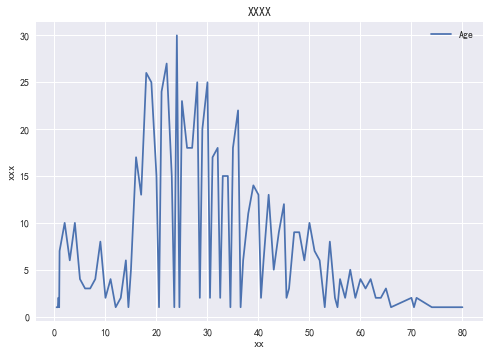

In [188]:
### 折线图1
data.Age.value_counts().sort_index().plot(kind='line',title='XXXX',legend='upper right')
plt.xlabel("xx")
plt.ylabel("xxx")

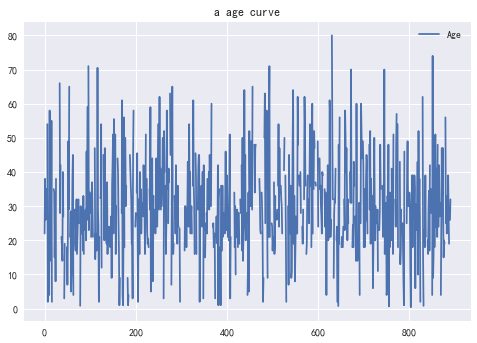

In [181]:
### 折线图2
data.Age.plot(kind='line',title='a age curve',legend='upper right')

# plt.title("A age Curve")
# plt.xlabel("x")
# plt.ylabel("age")
# plt.legend(loc="upper right")
# plt.axis('tight')  # 压缩坐标轴范围直至恰好覆盖图形

# plt.xlim(-11, 11)   # 调整坐标轴范围
# plt.ylim(-1.5, 1.5)
# plt.xticks(ticks=[1,2,3,5])  # 只标注X轴部分刻度   
# plt.text(3,-1,'测试',color='green',rotation=0,size=30)  # 设置文本  
# plt.axis('equal'); # 设置x轴与y轴使用相同的长度单位

## 条形图

Text(0.5, 0, 'xx')

Text(0, 0.5, 'xxx')

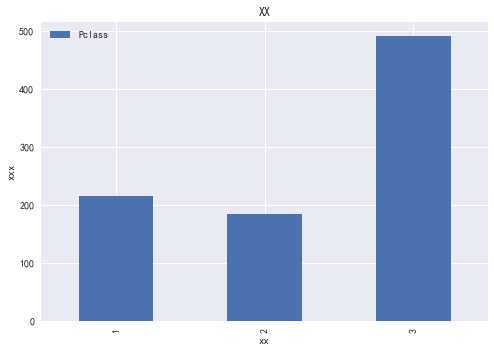

In [184]:
### 条形图1       利用列的索引和列的值来绘画，而不会自动整理
data.Pclass.value_counts().sort_index().plot(kind='bar',title='XX',legend='upper right')
plt.xlabel("xx")
plt.ylabel("xxx")

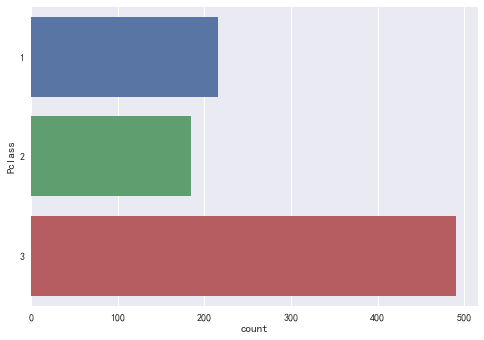

In [111]:
### 条形图2    相比上个方法而言，这种会自动整理
sns.countplot(y = 'Pclass' , data = data) 

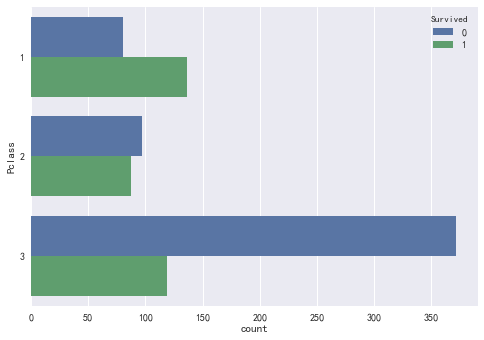

In [193]:
### 条形图3   先自动根据样本标签划分，然后再分别绘制一个条形图
sns.countplot(y = 'Pclass',hue='Survived' , data = data) 

Text(0, 0.5, 'resp_rate')

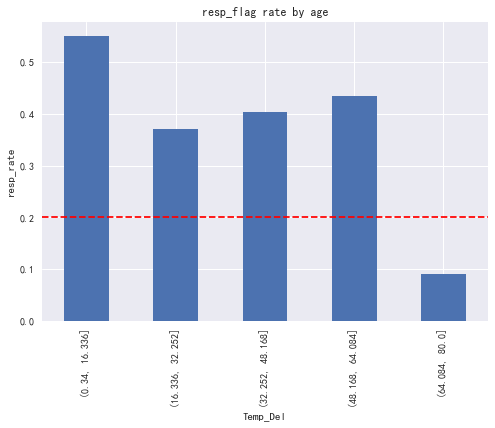

In [225]:
### 条形图4   特征在不同区间的‘违约率’的走势
data['Temp_Del'] = pd.cut(data.Age,bins=5) 
data.groupby('Temp_Del')['Survived'].mean().plot.bar(title='resp_flag rate by age')
plt.ylabel('resp_rate')
plt.axhline(y=0.2,color='r',linestyle='--')

## 饼图

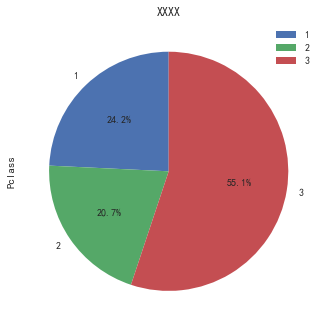

In [185]:
### 饼图1
data['Pclass'].value_counts().sort_index().plot(kind = 'pie',title='XXXX',legend='upper right',
                                                autopct='%1.1f%%',startangle=90)

<Figure size 375x375 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1621809bc8>,
 [Text(-0.8426489168532446, 0.7070663355909783, '吃饭'),
  Text(-1.0625183850389728, -0.2847010387304086, '交通'),
  Text(-0.9899493893896806, -0.9899495979326416, '游戏'),
  Text(1.0832885683038538, -0.19101276863651528, '衣服')],
 [Text(-0.38302223493329296, 0.3213937889049901, '27.8%'),
  Text(-0.4829629022904421, -0.12940956305927662, '2.8%'),
  Text(-0.5656853653655317, -0.565685484532938, '13.9%'),
  Text(0.4924038946835699, -0.08682398574387058, '55.6%')])

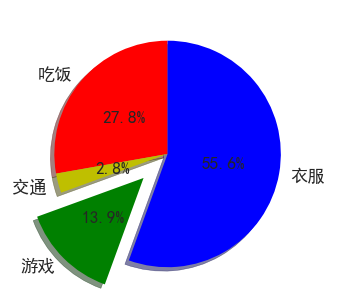

In [228]:
### 饼图2
labels = [ '吃饭', '交通', '游戏', '衣服']
data = [1000, 100, 500, 2000]
plt.figure(figsize=(3,3),dpi=125) # dpi的设置值越大，图形越大，但也越清晰 ， 可以进一步设置figsize来缩放
plt.pie(data,labels=labels,explode=(0, 0, 0.3, 0),colors=['r', 'y', 'g', 'b'],autopct='%1.1f%%',
        pctdistance=0.5,shadow=True,startangle=90)  
# explode的值，代表着扇区脱出去的程度   autopct的值 代表着扇区的数值的精度设置   pctdistance的值 代表着 扇区的百分比标签的偏移
# starttangle 设置 第一个扇区开始绘制的角度，一般默认是0度逆时针绘制  现在显式设置成90度逆时针绘制

## 茎叶图

In [150]:
from itertools import groupby

data1 = (1, 35, 57, 40, 73, 82, 68, 69, 52, 1, 23, 35, 55, 65, 48, 93, 59, 87, 2, 64)
data1 = sorted([str(e) for e in data1])     # 数据转换

# k 和 h 分别为每个数值的十位数字和个位数字的字符形式
for k, g in groupby(data1, key=lambda x: int(x) // 10):
    lst = map(str, [int(h) % 10 for h in list(g)])
    print (k, '|', ' '.join(lst))

0 | 1 1 2
2 | 3
3 | 5 5
4 | 0 8
5 | 2 5 7 9
6 | 4 5 8 9
7 | 3
8 | 2 7
9 | 3


## 箱线图

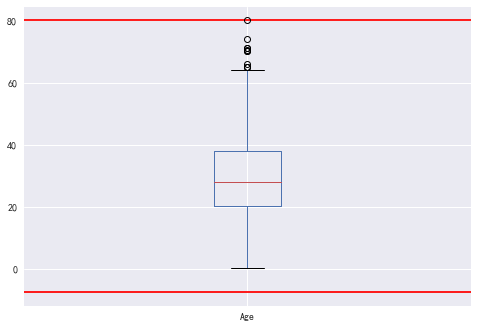

In [55]:
### 箱线图1
data.plot(kind='box',y=['Age'])
plt.hlines([-7.5, 80], 0.5, 1.5, colors='r')

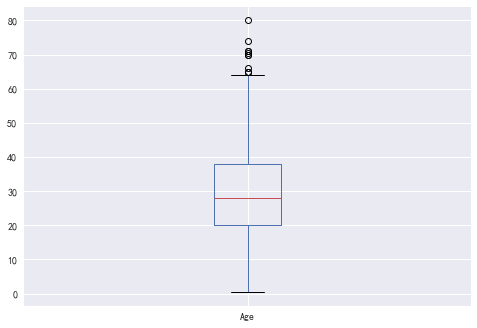

In [42]:
### 箱线图2
data.boxplot(column=['Age'])  # 利用DataFrame对象自带的方法画直方图

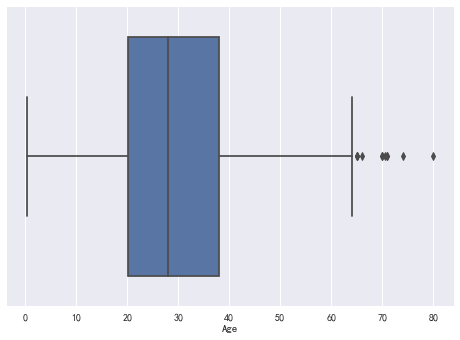

In [191]:
### 箱线图3 
sns.boxplot(x=data.Age)

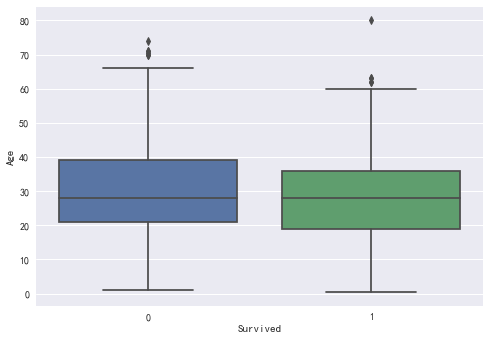

In [192]:
### 箱线图4
sns.boxplot(x =data['Survived'], y = data.Age)  ### 先自动根据样本标签划分，然后再分别绘制一个箱线图

## 直方图

E:\CabbageSoftware\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
E:\CabbageSoftware\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([30., 17., 15.,  9., 29., 64., 67., 70., 83., 62., 51., 40., 35.,
        27., 35., 23., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <a list of 25 Patch objects>)

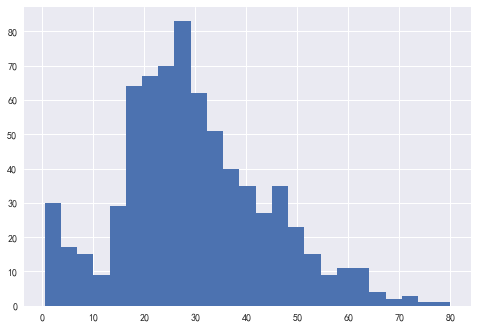

In [190]:
### 直方图1
plt.hist(data.Age ,bins = 25)

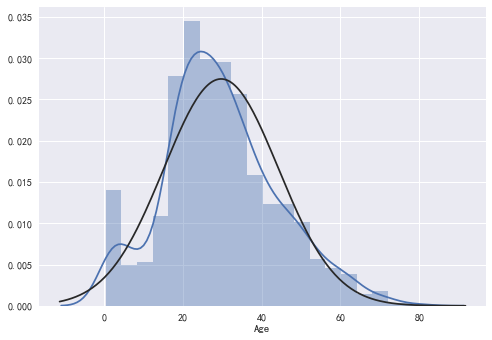

In [207]:
### 直方图2
sns.distplot(data.Age,fit=stats.norm)

## 散点图

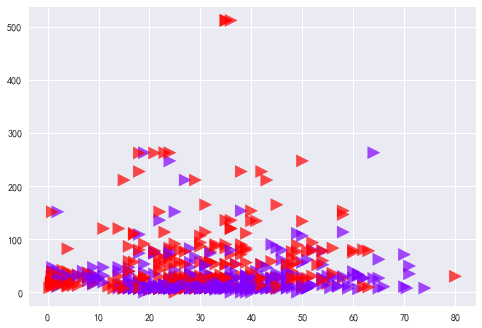

In [118]:
###  颜色根据样本点对应标签决定 同时其它参数也可以使用序列来设置从而产生渐变的效果
plt.scatter(data.Age, data.Fare,marker='>',c=data.Survived,cmap="rainbow",s=150,alpha=0.7)

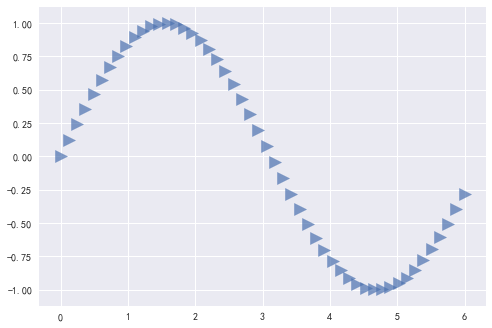

In [17]:
import random
x = np.linspace(0,6)
random.shuffle(x)
plt.scatter(x, np.sin(x),marker='>',cmap="rainbow",s=150,alpha=0.7)

## QQ图

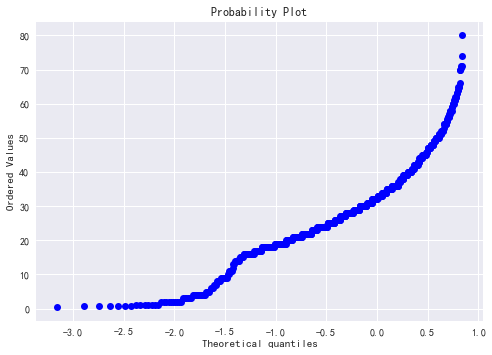

In [212]:
res = stats.probplot(data.Age,plot=plt)

## 分布对比图

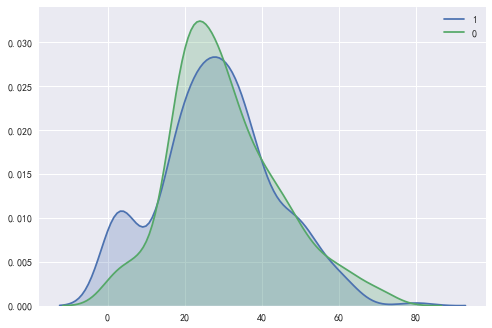

In [213]:
### 对比图1   在同一个数据集下某个字段在标签不同的情况下的分布比较
sns.kdeplot(data.Age[data.Survived==1], label='1', shade=True)
sns.kdeplot(data.Age[data.Survived==0], label='0', shade=True)

Text(0.5, 0, 'discount_rate')

Text(0, 0.5, 'Frequency')

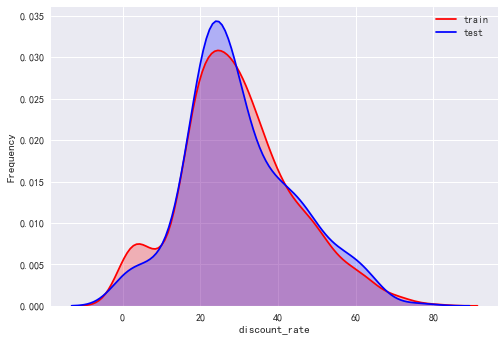

In [214]:
### 对比图2  某个特征在训练集和测试集的分布比较
ax = sns.kdeplot(data.Age,color="Red",shade=True)
ax = sns.kdeplot(dataT.Age,color="Blue",shade=True)
ax.set_xlabel('discount_rate')
ax.set_ylabel("Frequency")
ax = ax.legend(["train", "test"])

## 核密度估计图

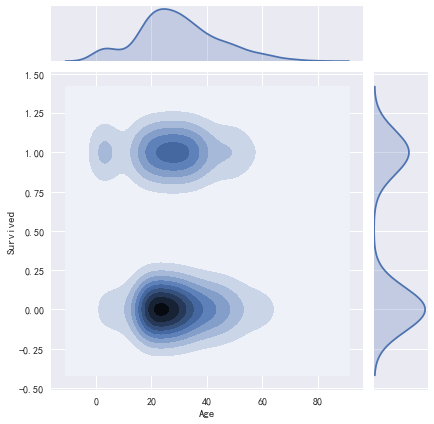

In [22]:
sns.jointplot(x='Age',y="Survived",data=data,kind="kde")

## 小提琴图

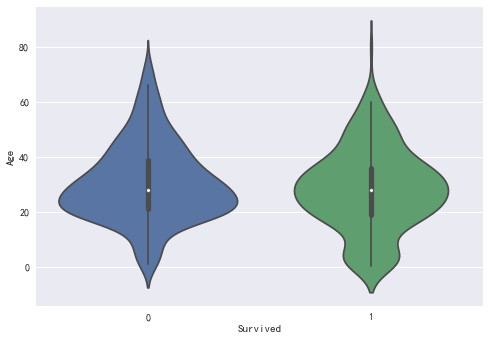

In [215]:
### 小提琴图2   在同一个数据集下某个字段在标签不同的情况下的分布比较
sns.violinplot(x = data.Survived, y = data.Age)

## 未知图

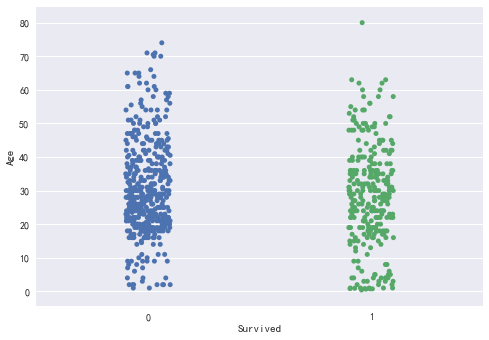

In [216]:
### 在同一个数据集下某个字段在标签不同的情况下的分布比较
sns.stripplot(x = data.Survived, y = data.Age)

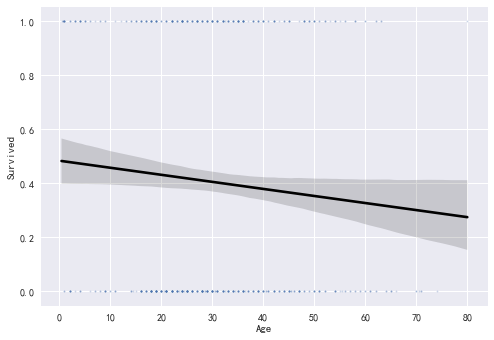

In [220]:
### 可视化 标签与某特征之间的线性关系  -- 绘图数据和线性回归模型拟合
sns.regplot(x='Age',
            y='Survived',
            data=data[['Age', 'Survived']],
            scatter_kws={
                'marker': '.',
                's': 3,
                'alpha': 0.3
            },
            line_kws={'color': 'k'})

In [ ]:
### 热力图

# 特征自定义删除

In [ ]:
data  = data.drop("SK_ID_CURR",axis=1)

# 重复行列删除

## 行处理

In [29]:
data.duplicated().sum() ### 检测是否存在重复行

0

In [26]:
data[data.duplicated()==True]  ### 找出重复行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
data  = data.drop(XXX,axis=0)  ### 删除重复行

## 列处理

In [30]:
data.T.duplicated().sum()  ### 检测是否存在重复列

0

In [31]:
data.T[data.T.duplicated()==True]  ### 找出重复列

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890


In [ ]:
data  = data.drop(XXX,axis=0)  ### 删除重复列

# ( 测试集划分 )

In [32]:
from sklearn.model_selection import train_test_split

Y = data.Survived
X = data.drop('Survived',axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [33]:
Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape

((623, 11), (623,), (268, 11), (268,))

# 异常值处理

## 异常值检测

In [34]:
### 方法1  不在[-1.5IQR，1.5IQR]
Fare_Q3 = np.quantile(data.Age,q=0.75)
Fare_Q1 = np.quantile(data.Age,q=0.25)
Fare_IQR = Fare_Q3 - Fare_Q1
Fare_UpLimit = Fare_Q3 + 1.5*Fare_IQR
Fare_LowLimit = Fare_Q1 - 1.5*Fare_IQR

In [35]:
### 方法2  不在[第5百分位数，第95百分位数]
Fare_Up = np.quantile(data.Age,q=0.95)
Fare_Low = np.quantile(data.Age,q=0.05)

In [37]:
### 方法3  不在[均值-3*标准差，均值+3*标准差]
Fare_Up = data.Age.mean() + 3*data.Age.std()
Fare_Low = data.Age.mean() - 3*data.Age.std()

R2= 0.05714988358252693
mse= 0.21997058643346673
---------------------------------------
mean of residuals: 1.0603253605970596e-17
std of residuals: 0.4693870864158605
---------------------------------------
0 outliers:
[]


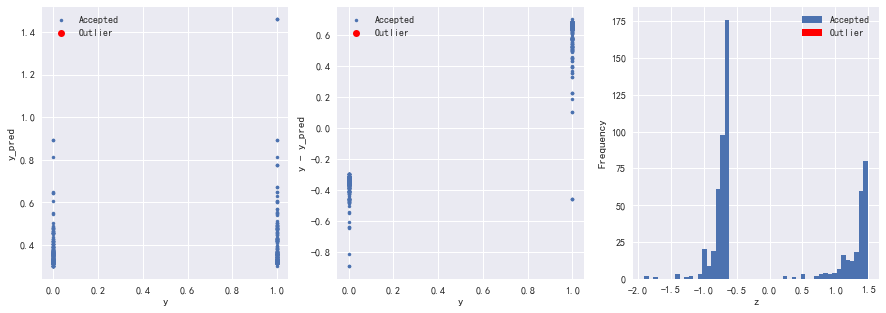

In [61]:
### 方法4  使用模型预测来检测
def find_outliers(model, X, y, sigma=3):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y_pred');

    ax_132=plt.subplot(1,3,2)
    plt.plot(y,y-y_pred,'.')
    plt.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('y')
    plt.ylabel('y - y_pred');

    ax_133=plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    plt.legend(['Accepted','Outlier'])
    plt.xlabel('z')
    
    plt.savefig('outliers.png')
    
    return outliers
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
outliers = find_outliers(Ridge(), Xtrain.Fare.to_frame(), Ytrain)

## 异常值处理

In [ ]:
### 方法一 剔除 根据偏离程度最大的特征的异常值删除样本


In [ ]:
### 方法二 替换
Xtrain['AMT_CREDIT_MOD'] = Xtrain['AMT_CREDIT'] > Fare_UpLimit
Xtest['AMT_CREDIT_MOD'] = Xtest['AMT_CREDIT'] > Fare_UpLimit
### 记录修改痕迹给模型 -- 既修正了原特征的偏态又创造了新特征

Xtrain['AMT_CREDIT'] = np.where(Xtrain['AMT_CREDIT'] > Fare_UpLimit, Fare_UpLimit, Xtrain['AMT_CREDIT'])
Xtest['AMT_CREDIT'] = np.where(Xtest['AMT_CREDIT'] > Fare_UpLimit, Fare_UpLimit, Xtest['AMT_CREDIT'])

In [66]:
### 方法三 转换  -- 右偏
data.Age**(1/2)  ## 平方根
data.Age**(1/3)  ## 立方根
np.log(data.Age)

### 方法三 转换  -- 左偏
data.Age**2
data.Age**3
np.exp(data.Age)

0      4.690416
1      6.164414
2      5.099020
3      5.916080
4      5.916080
         ...   
886    5.196152
887    4.358899
888         NaN
889    5.099020
890    5.656854
Name: Age, Length: 891, dtype: float64

0      2.802039
1      3.361975
2      2.962496
3      3.271066
4      3.271066
         ...   
886    3.000000
887    2.668402
888         NaN
889    2.962496
890    3.174802
Name: Age, Length: 891, dtype: float64

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888         NaN
889    3.258097
890    3.465736
Name: Age, Length: 891, dtype: float64

0       484.0
1      1444.0
2       676.0
3      1225.0
4      1225.0
        ...  
886     729.0
887     361.0
888       NaN
889     676.0
890    1024.0
Name: Age, Length: 891, dtype: float64

0      10648.0
1      54872.0
2      17576.0
3      42875.0
4      42875.0
        ...   
886    19683.0
887     6859.0
888        NaN
889    17576.0
890    32768.0
Name: Age, Length: 891, dtype: float64

0      3.584913e+09
1      3.185593e+16
2      1.957296e+11
3      1.586013e+15
4      1.586013e+15
           ...     
886    5.320482e+11
887    1.784823e+08
888             NaN
889    1.957296e+11
890    7.896296e+13
Name: Age, Length: 891, dtype: float64

In [ ]:
### 方法四 分箱   见后续

In [ ]:
### 方法五 分裂   待补充

In [ ]:
### 方法六 不处理

# 特征编码

## 分箱

In [ ]:
### 方法一  最优Chi-merge方法、最优IV方法、基于树的最优方法  但会自动将缺失值也给单独一箱    缺失处理应在这前面才对++

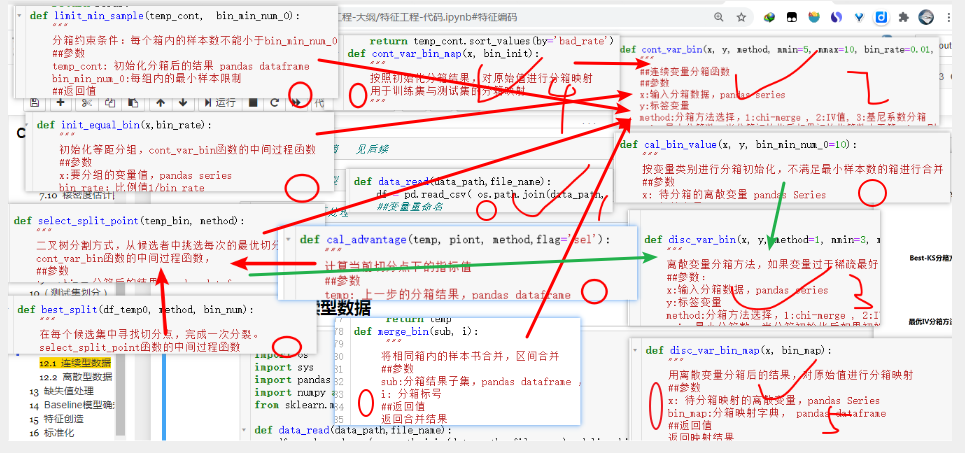

In [8]:
def cal_advantage(temp, piont, method,flag='sel'):
    """
    计算当前切分点下的指标值
    ##参数
    temp: 上一步的分箱结果，pandas dataframe
    piont: 切分点，以此来划分分箱
    method: 分箱方法选择，1:chi-merge , 2:IV值, 3:信息熵
    """
#    temp = binDS
    if flag == 'sel':
        ##用于最优切分点选择，这里只是二叉树，即二分
        bin_num = 2
        good_bad_matrix = np.empty((bin_num, 3))
        for ii in range(bin_num):
            if ii==0:
                df_temp_1 = temp[temp['bin_raw'] <= piont]
            else:
                df_temp_1 = temp[temp['bin_raw'] > piont]
            ##计算每个箱内的好坏样本书
            good_bad_matrix[ii][0] = df_temp_1['good'].sum()
            good_bad_matrix[ii][1] = df_temp_1['bad'].sum()
            good_bad_matrix[ii][2] = df_temp_1['total'].sum()
                    
    
    elif flag == 'gain':
       ##用于计算本次分箱后的指标结果，即分箱数，每增加一个，就要算一下当前分箱下的指标结果
       bin_num = temp['bin'].max()
       good_bad_matrix = np.empty((bin_num, 3))
       for ii in range(bin_num):
           df_temp_1 = temp[temp['bin'] == (ii + 1)]
           good_bad_matrix[ii][0] = df_temp_1['good'].sum()
           good_bad_matrix[ii][1] = df_temp_1['bad'].sum()
           good_bad_matrix[ii][2] = df_temp_1['total'].sum()
       
    ##计算总样本中的好坏样本
    total_matrix = np.empty(3)
    total_matrix[0] = temp.good.sum()
    total_matrix[1] = temp.bad.sum()
    total_matrix[2] = temp.total.sum()
    
    # Chi-merger分箱
    if method == 1:
        X2 = 0
        for i in range(bin_num):
            for j in range(2):
                expect = (total_matrix[j] / total_matrix[2])*good_bad_matrix[i][2]
                X2 = X2 + (good_bad_matrix[i][j] - expect )**2/expect
        M_value = X2
    # IV分箱
    elif method == 2:
        if pd.isnull(total_matrix[0]) or  pd.isnull(total_matrix[1]) or total_matrix[0] == 0 or total_matrix[1] == 0:
            M_value = np.NaN
        else:
            IV = 0
            for i in range(bin_num):
                ##坏好比
                weight = good_bad_matrix[i][1] / total_matrix[1] - good_bad_matrix[i][0] / total_matrix[0]
                IV = IV + weight * np.log( (good_bad_matrix[i][1] * total_matrix[0]) / (good_bad_matrix[i][0] * total_matrix[1]))
            M_value = IV
    # 信息熵分箱
    elif method == 3:
        ##总的信息熵    
        entropy_total = 0
        for j in range(2):
            weight = (total_matrix[j]/ total_matrix[2])
            entropy_total = entropy_total - weight * (np.log(weight))
                    
        ##计算条件熵
        entropy_cond = 0
        for i in range(bin_num):
            entropy_temp = 0
            for j in range(2):
                entropy_temp = entropy_temp - ((good_bad_matrix[i][j] / good_bad_matrix[i][2]) \
                                         * np.log(good_bad_matrix[i][j] / good_bad_matrix[i][2]) )
            entropy_cond = entropy_cond + good_bad_matrix[i][2]/total_matrix[2] * entropy_temp 
        
        ##计算归一化信息增益   
        M_value = 1 - (entropy_cond / entropy_total)  
    # Best-Ks分箱
    else:
        pass
    return M_value

def best_split(df_temp0, method, bin_num):
    """
    在每个候选集中寻找切分点，完成一次分裂。
    select_split_point函数的中间过程函数
    ##参数
    df_temp0: 上一次分箱后的结果，pandas dataframe
    method: 分箱方法选择，1:chi-merge , 2:IV值, 3:信息熵
    bin_num: 分箱编号，在不同编号的分箱结果中继续二分
    ##返回值
    返回在本次分箱标号内的最有切分结果， pandas dataframe
    """
#    df_temp0 = df_temp
#    bin_num = 1
    df_temp0 = df_temp0.sort_values(by=['bin', 'bad_rate'])
    piont_len = len(df_temp0[df_temp0['bin'] == bin_num])  ##候选集的长度
    bestValue = 0
    bestI = 1
    ##以候选集的每个切分点做分隔，计算指标值
    for i in range(1, piont_len):
        #计算指标值 
        value = cal_advantage(df_temp0,i,method,flag='sel')
        if bestValue < value:
            bestValue = value
            bestI = i
    # create new var split
    df_temp0['split'] = np.where(df_temp0['bin_raw'] <= bestI, 1, 0)
    df_temp0 = df_temp0.drop('bin_raw', axis=1)
    newbinDS = df_temp0.sort_values(by=['split', 'bad_rate'])
    # rebuild var i
    newbinDS_0 = newbinDS[newbinDS['split'] == 0]
    newbinDS_1 = newbinDS[newbinDS['split'] == 1]
    newbinDS_0 = newbinDS_0.copy()
    newbinDS_1 = newbinDS_1.copy()
    newbinDS_0['bin_raw'] = range(1, len(newbinDS_0) + 1)
    newbinDS_1['bin_raw'] = range(1, len(newbinDS_1) + 1)
    newbinDS = pd.concat([newbinDS_0, newbinDS_1], axis=0)
    return newbinDS  


def select_split_point(temp_bin, method):
    """
    二叉树分割方式，从候选者中挑选每次的最优切分点，与切分后的指标计算
    cont_var_bin函数的中间过程函数，
    ##参数
    temp_bin: 分箱后的结果 pandas dataframe
    method:分箱方法选择，1:chi-merge , 2:IV值, 3:信息熵
    ##返回值
    新的分箱结果  pandas dataframe
    """
#    temp_bin = df_temp_all
    temp_bin = temp_bin.sort_values(by=['bin', 'bad_rate'])
    ##得到最大的分箱值
    max_num = max(temp_bin['bin'])
#    temp_binC = dict()
#    m = dict()
#    ##不同箱内的数据取出来
#    for i in range(1, max_num + 1):
#        temp_binC[i] = temp_bin[temp_bin['bin'] == i]
#        m[i] = len(temp_binC[i])
    temp_main = dict()
    bin_i_value = []
    for i in range(1, max_num + 1):
        df_temp = temp_bin[temp_bin['bin'] == i]
        if df_temp.shape[0]>1 : 
            ##bin=i的做分裂
            temp_split= best_split(df_temp, method, i)
            ##完成一次分箱，更新bin的之
            temp_split['bin'] = np.where(temp_split['split'] == 1,
                                               max_num + 1,
                                               temp_split['bin'])
            ##取出bin!=i合并为新租
            temp_main[i] = temp_bin[temp_bin['bin'] != i]
            temp_main[i] = pd.concat([temp_main[i], temp_split ], axis=0, sort=False)
            ##计算新分组的指标值
            value = cal_advantage(temp_main[i],0, method,flag='gain')
            newdata = [i, value]
            bin_i_value.append(newdata)
    # find maxinum of value bintoSplit
    bin_i_value.sort(key=lambda x: x[1], reverse=True)
    # binNum = temp_all_Vals['BinToSplit']
    binNum = bin_i_value[0][0]
    newBins = temp_main[binNum].drop('split', axis=1)
    return newBins.sort_values(by=['bin', 'bad_rate']), round( bin_i_value[0][1] ,4)


def init_equal_bin(x,bin_rate):
    """
    初始化等距分组，cont_var_bin函数的中间过程函数
    ##参数
    x:要分组的变量值，pandas series
    bin_rate：比例值1/bin_rate
    ##返回值
    返回初始化分箱结果，pandas dataframe
    """
    ##异常值剔除，只考虑90%没的最大值与最小值，边界与-inf或inf分为一组
    if len(x[x > np.percentile(x, 95)]) > 0 and len(np.unique(x)) >=30:
        var_up= min( x[x > np.percentile(x, 95)] )
    else:
        var_up = max(x)
    if len(x[x < np.percentile(x, 5)]) > 0:
        var_low= max( x[x < np.percentile(x, 5)] )
    else:
        var_low = min(x)
    ##初始化分组
    bin_num = int(1/ bin_rate)
    dist_bin = (var_up - var_low) / bin_num  ##分箱间隔
    bin_up = []
    bin_low = []
    for i in range(1, bin_num + 1):
        if i == 1:
            bin_up.append( var_low + i * dist_bin)
            bin_low.append(-np.inf)
        elif i == bin_num:
            bin_up.append( np.inf)
            bin_low.append( var_low + (i - 1) * dist_bin )
        else:
            bin_up.append( var_low + i * dist_bin )
            bin_low.append( var_low + (i - 1) * dist_bin )
    result = pd.DataFrame({'bin_up':bin_up,'bin_low':bin_low})
    result.index.name = 'bin_num'
    return result
def limit_min_sample(temp_cont,  bin_min_num_0):
    """
    分箱约束条件：每个箱内的样本数不能小于bin_min_num_0，cont_var_bin函数的中间过程函数
    ##参数
    temp_cont: 初始化分箱后的结果 pandas dataframe
    bin_min_num_0:每组内的最小样本限制
    ##返回值
    合并后的分箱结果，pandas dataframe
    """
    for i in temp_cont.index:
        rowdata = temp_cont.loc[i, :]
        if i == temp_cont.index.max():
            ##如果是最后一个箱就，取倒数第二个值
            ix = temp_cont[temp_cont.index < i].index.max()
        else:
            ##否则就取大于i的最小的分箱值
            ix = temp_cont[temp_cont.index > i].index.min()
        ##如果0, 1, total项中样本的数量小于20则进行合并
        if rowdata['total'] <= bin_min_num_0:
            # 与相邻的bin合并
            temp_cont.loc[ix, 'bad'] = temp_cont.loc[ix, 'bad'] + rowdata['bad']
            temp_cont.loc[ix, 'good'] = temp_cont.loc[ix, 'good'] + rowdata['good']
            temp_cont.loc[ix, 'total'] = temp_cont.loc[ix, 'total'] + rowdata['total']
            if i < temp_cont.index.max():
                temp_cont.loc[ix, 'bin_low'] = rowdata['bin_low']
            else:
                temp_cont.loc[ix, 'bin_up'] = rowdata['bin_up']
            temp_cont = temp_cont.drop(i, axis=0)  
    return temp_cont.sort_values(by='bad_rate')
def cont_var_bin_map(x, bin_init):
    """
    按照初始化分箱结果，对原始值进行分箱映射
    用于训练集与测试集的分箱映射
    """
    temp = x.copy()
    for i in bin_init.index:
        bin_up = bin_init['bin_up'][i]
        bin_low = bin_init['bin_low'][i]
        # 寻找出 >lower and <= upper的位置
        if pd.isnull(bin_up) or pd.isnull(bin_up):
            temp[pd.isnull(temp)] = i
        else:
            index = (x > bin_low) & (x <= bin_up)
            temp[index] = i
    temp.name = temp.name + "_BIN"
    return temp
def merge_bin(sub, i):
    """
    将相同箱内的样本书合并，区间合并
    ##参数
    sub:分箱结果子集，pandas dataframe ，如bin=1的结果
    i: 分箱标号
    ##返回值
    返回合并结果
    """
    l = len(sub)
    total = sub['total'].sum()
    first = sub.iloc[0, :]
    last = sub.iloc[l - 1, :]

    lower = first['bin_low']
    upper = last['bin_up']
    df = pd.DataFrame()
    df = df.append([i, lower, upper, total], ignore_index=True).T
    df.columns = ['bin', 'bin_low', 'bin_up', 'total']
    return df


def cont_var_bin(x, y, method, mmin=5, mmax=10, bin_rate=0.01, stop_limit=0.1, bin_min_num=20):
    """
    ##连续变量分箱函数
    ##参数
    x:输入分箱数据，pandas series
    y:标签变量
    method:分箱方法选择，1:chi-merge , 2:IV值, 3:基尼系数分箱
    mmin:最小分箱数，当分箱初始化后如果初始化箱数小于等mmin，则mmin=2，即最少分2箱，
         如果分两箱也无法满足箱内最小样本数限制而分1箱，则变量删除
    mmax:最大分箱数，当分箱初始化后如果初始化箱数小于等于mmax，则mmax等于初始化箱数-1
    bin_rate：等距初始化分箱参数，分箱数为1/bin_rate,分箱间隔在数据中的最小值与最大值将等间隔取值
    stop_limit:分箱earlystopping机制，如果已经没有明显增益即停止分箱
    bin_min_num:每组最小样本数
    ##返回值
    分箱结果：pandas dataframe
    """
#    x= data_train.amount
#    y = data_train.target
#    method=2
#    mmin=4
#    mmax=10
#    bin_rate=0.01
#    stop_limit=0.05
#    bin_min_num=5

    ##缺失值单独取出来
    df_na = pd.DataFrame({'x': x[pd.isnull(x)], 'y': y[pd.isnull(x)]})
    y = y[~pd.isnull(x)]
    x = x[~pd.isnull(x)]
    ##初始化分箱，等距的方式，后面加上约束条件,没有箱内样本数没有限制
    bin_init = init_equal_bin(x, bin_rate)
    ##分箱映射
    bin_map = cont_var_bin_map(x, bin_init)
    
    df_temp = pd.concat([x, y, bin_map], axis=1)
    ##计算每个bin中好坏样本的频数
    df_temp_1 = pd.crosstab(index=df_temp[bin_map.name], columns=y)
    df_temp_1.rename(columns= dict(zip([0,1], ['good', 'bad'])) , inplace=True)
    ##计算每个bin中一共有多少样本
    df_temp_2 = pd.DataFrame(df_temp.groupby(bin_map.name).count().iloc[:, 0])
    df_temp_2.columns = ['total']
    df_temp_all= pd.merge(pd.concat([df_temp_1, df_temp_2], axis=1), bin_init,
                         left_index=True, right_index=True,
                         how='left')
    
    ####做分箱上下限的整理，让候选点连续
    for j in range(df_temp_all.shape[0]-1):
        if df_temp_all.bin_low.loc[df_temp_all.index[j+1]] !=  df_temp_all.bin_up.loc[df_temp_all.index[j]]:
            df_temp_all.bin_low.loc[df_temp_all.index[j+1]] = df_temp_all.bin_up.loc[df_temp_all.index[j]]
        
    ##离散变量中这个值为badrate,连续变量时为索引，索引值是分箱初始化时，箱内有变量的箱的索引
    df_temp_all['bad_rate'] = df_temp_all.index
    ##最小样本数限制，进行分箱合并
    df_temp_all = limit_min_sample(df_temp_all, bin_min_num)
    ##将合并后的最大箱数与设定的箱数进行比较，这个应该是分箱数的最大值
    if mmax >= df_temp_all.shape[0]:
        mmax = df_temp_all.shape[0]-1
    if mmin >= df_temp_all.shape[0]:
        gain_value_save0=0
        gain_rate_save0=0
        df_temp_all['bin'] = np.linspace(1,df_temp_all.shape[0],df_temp_all.shape[0],dtype=int)
        data = df_temp_all[['bin_low','bin_up','total','bin']]
        data.index = data['bin']
    else:
        df_temp_all['bin'] = 1
        df_temp_all['bin_raw'] = range(1, len(df_temp_all) + 1)
        df_temp_all['var'] = df_temp_all.index  ##初始化箱的编号
        gain_1 = 1e-10
        gain_rate_save0 = []
        gain_value_save0 = []
        ##分箱约束：最大分箱数限制
        for i in range(1,mmax):
    #        i = 1
            df_temp_all, gain_2 = select_split_point(df_temp_all, method=method)
            gain_rate = gain_2 / gain_1 - 1  ## ratio gain
            gain_value_save0.append(np.round(gain_2,4))
            if i == 1:
                gain_rate_save0.append(0.5)
            else:
                gain_rate_save0.append(np.round(gain_rate,4))
            gain_1 = gain_2
            if df_temp_all.bin.max() >= mmin and df_temp_all.bin.max() <= mmax:
                if gain_rate <= stop_limit or pd.isnull(gain_rate):
                    break
                
    
        df_temp_all = df_temp_all.rename(columns={'var': 'oldbin'})
        temp_Map1 = df_temp_all.drop(['good', 'bad', 'bad_rate', 'bin_raw'], axis=1)
        temp_Map1 = temp_Map1.sort_values(by=['bin', 'oldbin'])
        # get new lower, upper, bin, total for sub
        data = pd.DataFrame()
        for i in temp_Map1['bin'].unique():
            ##得到这个箱内的上下界
            sub_Map = temp_Map1[temp_Map1['bin'] == i]
            rowdata = merge_bin(sub_Map, i)
            data = data.append(rowdata, ignore_index=True)
    
        # resort data
        data = data.sort_values(by='bin_low')
        data = data.drop('bin', axis=1)
        mmax = df_temp_all.bin.max()
        data['bin'] = range(1, mmax + 1)
        data.index = data['bin']
    ##将缺失值的箱加过来
    if len(df_na) > 0:
        row_num = data.shape[0] + 1
        data.loc[row_num, 'bin_low'] = np.nan
        data.loc[row_num, 'bin_up'] = np.nan
        data.loc[row_num, 'total'] = df_na.shape[0]
        data.loc[row_num, 'bin'] = data.bin.max() + 1
    return data , gain_value_save0 ,gain_rate_save0


def cal_bin_value(x, y, bin_min_num_0=10):
    """
    按变量类别进行分箱初始化，不满足最小样本数的箱进行合并
    ##参数
    x: 待分箱的离散变量 pandas Series
    y: 标签变量
    target: 正样本标识
    bin_min_num_0：箱内的最小样本数限制
    ##返回值
    计算结果
    """
    ##按类别x计算yz中0,1两种状态的样本数
    df_temp = pd.crosstab(index=x, columns=y, margins=False)
    df_temp.rename(columns= dict(zip([0,1], ['good', 'bad'])) , inplace=True)
    df_temp = df_temp.assign(total=lambda x:x['good']+ x['bad'],bin=1,var_name=df_temp.index).assign(bad_rate=lambda x:x['bad']/ x['total'])

    ##按照baterate排序
    df_temp = df_temp.sort_values(by='bad_rate')
    df_temp = df_temp.reset_index(drop=True)
    ##样本数不满足最小值进行合并
    for i in df_temp.index:
        rowdata = df_temp.loc[i, :]
        if i == df_temp.index.max():
            ##如果是最后一个箱就，取倒数第二个值
            ix = df_temp[df_temp.index < i].index.max()
        else:
            ##否则就取大于i的最小的分箱值
            ix = df_temp[df_temp.index > i].index.min()
        ##如果0, 1, total项中样本的数量小于20则进行合并
        if any(rowdata[:3] <= bin_min_num_0):
            # 与相邻的bin合并
            df_temp.loc[ix, 'bad'] = df_temp.loc[ix, 'bad'] + rowdata['bad']
            df_temp.loc[ix, 'good'] = df_temp.loc[ix, 'good'] + rowdata['good']
            df_temp.loc[ix, 'total'] = df_temp.loc[ix, 'total'] + rowdata['total']
            df_temp.loc[ix, 'bad_rate'] = df_temp.loc[ix,'bad'] / df_temp.loc[ix, 'total']
            # 将区间也进行合并
            df_temp.loc[ix, 'var_name'] = str(rowdata['var_name']) +'||'+ str(df_temp.loc[ix, 'var_name'])
         
            df_temp = df_temp.drop(i, axis=0)  ##删除原来的bin
    ##如果离散变量小于等于5，每个变量为一个箱
    df_temp['bin_raw'] = range(1, df_temp.shape[0] + 1)
    df_temp = df_temp.reset_index(drop=True)
    return df_temp


def disc_var_bin(x, y, method=1, mmin=3, mmax=8, stop_limit=0.1, bin_min_num = 20  ):
    """
    离散变量分箱方法，如果变量过于稀疏最好先编码在按连续变量分箱
    ##参数：
    x:输入分箱数据，pandas series
    y:标签变量
    method:分箱方法选择，1:chi-merge , 2:IV值, 3:信息熵
    mmin:最小分箱数，当分箱初始化后如果初始化箱数小于等mmin，则mmin=2，即最少分2箱，
         如果分两厢也无法满足箱内最小样本数限制而分1箱，则变量删除
    mmax:最大分箱数，当分箱初始化后如果初始化箱数小于等于mmax，则mmax等于初始化箱数-1
    stop_limit:分箱earlystopping机制，如果已经没有明显增益即停止分箱
    bin_min_num:每组最小样本数
    ##返回值
    分箱结果：pandas dataframe
    """
#    x = data_train.purpose
#    y = data_train.target
    del_key = []    
    ##缺失值单独取出来
    df_na = pd.DataFrame({'x': x[pd.isnull(x)], 'y': y[pd.isnull(x)]})
    y = y[~pd.isnull(x)]
    x = x[~pd.isnull(x)]
    ##数据类型转化
    if np.issubdtype(x.dtype, np.int_):
        x = x.astype('float').astype('str')
    if np.issubdtype(x.dtype, np.float_):
        x = x.astype('str')
  
    ##按照类别分箱，得到每个箱下的统计值
    temp_cont = cal_bin_value(x, y,bin_min_num)
    
    ##如果去掉缺失值后离散变量的可能取值小于等于5不分箱
    if len(x.unique()) > 5:
        ##将合并后的最大箱数与设定的箱数进行比较，这个应该是分箱数的最大值
        if mmax >= temp_cont.shape[0]:
            mmax = temp_cont.shape[0]-1
        if mmin >= temp_cont.shape[0]:
            mmin = 2
            mmax = temp_cont.shape[0]-1
        if mmax ==1:
            print('变量 {0}合并后分箱数为1，该变量删除'.format(x.name))
            del_key.append(x.name)
        
        gain_1 = 1e-10
        gain_value_save0 = []
        gain_rate_save0 = []
        for i in range(1,mmax):
            temp_cont, gain_2 = select_split_point(temp_cont, method=method)
            gain_rate = gain_2 / gain_1 - 1  ## ratio gain
            gain_value_save0.append(np.round(gain_2,4))
            if i == 1:
                gain_rate_save0.append(0.5)
            else:
                gain_rate_save0.append(np.round(gain_rate,4))
            gain_1 = gain_2
            if temp_cont.bin.max() >= mmin and temp_cont.bin.max() <= mmax:
                if gain_rate <= stop_limit:
                    break
    
        temp_cont = temp_cont.rename(columns={'var': x.name})
        temp_cont = temp_cont.drop(['good', 'bad', 'bin_raw', 'bad_rate'], axis=1)
    else:
        temp_cont.bin = temp_cont.bin_raw
        temp_cont = temp_cont[['total', 'bin', 'var_name']]
        gain_value_save0=[]
        gain_rate_save0=[]
        del_key=[]
    ##将缺失值的箱加过来
    if len(df_na) > 0:
        index_1 = temp_cont.shape[0] + 1
        temp_cont.loc[index_1, 'total'] = df_na.shape[0]
        temp_cont.loc[index_1, 'bin'] = temp_cont.bin.max() + 1
        temp_cont.loc[index_1, 'var_name'] = 'NA'
    temp_cont = temp_cont.reset_index(drop=True)  
    if temp_cont.shape[0]==1:
        del_key.append(x.name)
    return temp_cont.sort_values(by='bin') , gain_value_save0 , gain_rate_save0,del_key


def disc_var_bin_map(x, bin_map):
    """
    用离散变量分箱后的结果，对原始值进行分箱映射
    ##参数
    x: 待分箱映射的离散变量，pandas Series
    bin_map:分箱映射字典， pandas dataframe
    ##返回值
    返回映射结果
    """
    ##数据类型转化
    xx = x[~pd.isnull(x)]
    if np.issubdtype(xx.dtype, np.int_):
        x[~pd.isnull(x)] = xx.astype('float').astype('str')
    if np.issubdtype(xx.dtype, np.float_):
        x[~pd.isnull(x)] = xx.astype('str') 
    d = dict()
    for i in bin_map.index:
        for j in  bin_map.loc[i,'var_name'].split('||'):
            if j != 'NA':
                d[j] = bin_map.loc[i,'bin']

    new_x = x.map(d)
    ##有缺失值要做映射
    if sum(pd.isnull(new_x)) > 0:
        index_1 = bin_map.index[bin_map.var_name == 'NA']
        if len(index_1) > 0:
            new_x[pd.isnull(new_x)] = bin_map.loc[index_1,'bin'].tolist()
    new_x.name = x.name + '_BIN'

    return new_x

### 连续型型数据分箱  method=1：最优Chi-merge分箱     2:IV分箱      3：信息增益分箱   最终分箱个数自动计算
data_test1,gain_value_save1 ,gain_rate_save1  = cont_var_bin(data.Age, data.Survived, 
                             method=1, mmin=4 ,mmax=20,bin_rate=0.01,stop_limit=0.1 ,bin_min_num=20 )
data_test1
gain_value_save1
gain_rate_save1
cont_var_bin_map(data.Age,data_test1)


### 离散型数据分箱  离散型数据的可能值可以很多、也可以稀疏，但建议稀疏  最终分箱个数自动计算
data_test1,gain_value_save1 ,gain_rate_save1,del_key_1  = disc_var_bin(data.Cabin, data.Survived, 
                             method=1, mmin=3,mmax=12, stop_limit=0.1, bin_min_num=5)
if len(del_key_1)>0:   ### 若特征处理后分箱数只有一个，那么就不对它进行映射
    del data_test1

data_test1
disc_var_bin_map(data.Cabin,data_test1)

,bin_low,bin_up,total,bin
bin,,,,
1,-inf,8.40,54.0,1.0
2,8.40,19.20,110.0,2.0
3,19.20,21.36,40.0,3.0
4,21.36,54.30,468.0,4.0
5,54.30,inf,42.0,5.0
6,NaN,NaN,177.0,6.0


[16.4365, 18.0553, 22.4878, 23.9746]

[0.5, 0.0985, 0.2455, 0.0661]

0      4.0
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
886    4.0
887    2.0
888    6.0
889    4.0
890    4.0
Name: Age_BIN, Length: 891, dtype: float64

,total,bin,var_name
0,130.0,1.0,B35||B79||E25||E24||E17||E121||E12||E101||E10|...
1,62.0,2.0,A10||B86||B94||C110||C111||C118||C124||C128||C...
2,12.0,2.0,C65||B51 B53 B55||C78||B22||C83||E44
3,687.0,3.0,NA


0      3.0
1      1.0
2      3.0
3      2.0
4      3.0
      ... 
886    3.0
887    1.0
888    3.0
889    1.0
890    3.0
Name: Cabin_BIN, Length: 891, dtype: float64

In [30]:
### 方法二   等深分箱  每个区间样本量接近一致
pd.qcut(data.Age,4).value_counts()

(20.125, 28.0]     183
(0.419, 20.125]    179
(38.0, 80.0]       177
(28.0, 38.0]       175
Name: Age, dtype: int64

In [31]:
### 方法三   等宽分箱  每个区间值域接近一致
pd.cut(data.Age,4).value_counts()

(20.315, 40.21]    385
(0.34, 20.315]     179
(40.21, 60.105]    128
(60.105, 80.0]      22
Name: Age, dtype: int64

## 编码

In [34]:
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [53]:
### 方法一 Label方法  ### 仅适合定序离散型  每次只能一个特征  但自动把NA值也映射成一个数值
le = LabelEncoder().fit_transform(data.Cabin.astype('str'))
le

array([147,  81, 147,  55, 147, 147, 129, 147, 147, 147, 145,  49, 147,
       147, 147, 147, 147, 147, 147, 147, 147, 111, 147,  13, 147, 147,
       147,  63, 147, 147, 147,  41, 147, 147, 147, 147, 147, 147, 147,
       147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147,
       101, 147,  23,  71, 147, 147, 147, 147, 147,  21,  80, 147, 147,
       147, 142, 147, 147, 147, 147, 147, 147, 147, 147, 140, 147, 147,
       147, 147, 147, 147, 147, 147, 147, 147, 147, 147,  63, 147, 147,
       147, 122, 147, 147, 147,  12,  91, 147, 147, 147, 147,  98, 147,
       147, 147, 147, 147, 147, 147,  52, 147, 147, 147, 147, 147, 147,
       147,  36, 147, 147, 147, 147, 116,  98, 147, 147, 147, 138, 147,
       147, 147, 147, 147, 147, 147, 107,  55, 147,  45, 147, 147, 147,
       147, 147, 147, 147, 147, 141, 147, 147,  61, 147, 147, 147, 147,
       147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 123, 147, 147,
       147,  18, 147, 147, 147,  14, 147, 147,  69, 147, 147, 14

In [79]:
### 方法二 One-hot方法  ### 可以一次性投入整个数据集   但要求处理的特征不能有缺失值,否则无法运行
OneHotEncoder().fit_transform(data.Cabin.values.reshape(-1,1))

ValueError: Input contains NaN

In [64]:
### 方法三 Dummy方法   ### 可以一次性投入整个数据集  但会默认不将单个特征的缺失值生成一列，即a，b，c，NA，最后只会生出3列
pd.get_dummies(data.Pclass)

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [84]:
### 方法四 WOE方法   要求处理的特征不能有缺失值,否则无法运行
def woe_cal_trans(x, y, target=1):   ### 默认少数样本作为正样本，即其标签对应为1
    ##计算总体的正负样本数
    p_total = sum(y == target)
    n_total = len(x)-p_total
    value_num = list(x.unique())
    woe_map = {}
    iv_value = 0
    for i in value_num:
        ##计算该变量取值箱内的正负样本总数    
        y1 = y[np.where(x == i)[0]]
        p_num_1 = sum(y1 == target)
        n_num_1 = len(y1) - p_num_1
        ##计算占比
        bad_1 = p_num_1 / p_total
        good_1 =  n_num_1 / n_total
        if bad_1 == 0:
            bad_1 = 1e-5
        elif good_1 == 0:
            good_1 = 1e-5
        woe_map[i] = np.log(bad_1 / good_1)
        iv_value += (bad_1 - good_1) * woe_map[i]
    x_woe_trans = x.map(woe_map)
    x_woe_trans.name = x.name + "_woe"
    return x_woe_trans, woe_map, iv_value

### 训练集
x_woe_trans, woe_map, info_value = woe_cal_trans(data.Fare, data.Survived)
x_woe_trans, woe_map, info_value

### 测试集
dataT.Fare.map(woe_map)

(0     -2.011619
 1      5.678115
 2      0.250144
 3      0.878753
 4     -1.554861
          ...   
 886   -0.012220
 887    2.082726
 888   -5.897974
 889    2.082726
 890   -0.132848
 Name: Fare_woe, Length: 891, dtype: float64,
 {7.25: -2.0116189453410747,
  71.2833: 5.678114727907623,
  7.925: 0.25014415313271554,
  53.1: 0.8787528125550899,
  8.05: -1.55486054284536,
  8.4583: -5.204827023460698,
  51.8625: 0.4732877044469254,
  21.075: -6.591121384580588,
  11.1333: 6.776727016575733,
  30.0708: 0.4732877044469254,
  16.7: 6.371261908467568,
  26.55: 0.6068190970714479,
  31.275: -7.150737172516011,
  7.8542: -0.7306850998790106,
  16.0: 5.678114727907623,
  29.125: -6.814264935894798,
  13.0: -0.012220111334775444,
  18.0: -6.303439312128807,
  7.225: -0.6253245842211844,
  26.0: 0.4087491833093543,
  8.0292: 5.678114727907623,
  35.5: 1.5718999931150353,
  31.3875: 1.5718999931150353,
  263.0: 0.4732877044469254,
  7.8792: 7.064409089027514,
  7.8958: -3.137630208197299,
  27

# 缺失值处理

In [92]:
### 整个数据集的 特征缺失程度检测
NA = data.isnull().sum().reset_index()
NA.columns = ['Var','NA_count']
NA = NA[NA.NA_count>0]
NA['NA_precent'] = NA.NA_count/data.shape[0]
NA.sort_values(by='NA_precent',ascending=False,inplace=True)
NA

### 整个数据集的 样本缺失程度检测
NA1 = data.T.isnull().sum().reset_index()
NA1.columns = ['Sample','NA_count']
NA1 = NA1[NA1.NA_count>0]
NA1['NA_precent'] = NA1.NA_count/data.T.shape[0]
NA1.sort_values(by='NA_precent',ascending=False,inplace=True)
NA1

,Var,NA_count,NA_precent
10,Cabin,687,0.771044
5,Age,177,0.198653
11,Embarked,2,0.002245


,Sample,NA_count,NA_precent
502,502,2,0.166667
181,181,2,0.166667
760,760,2,0.166667
388,388,2,0.166667
589,589,2,0.166667
...,...,...,...
326,326,1,0.083333
328,328,1,0.083333
333,333,1,0.083333
338,338,1,0.083333


In [ ]:
### 方法一 剔除   阈值自定义  ----

### 特征剔除
data = data.drop("XXX",axis=0)

### 样本剔除
data = data.drop("XXX",axis=1)

In [93]:
### 方法二  均值填补

## 筛选出特征含缺失值且为连续型类型的特征名
d_label = list(set(train_data.columns[train_data.dtypes != 'object']) & set(NA.Var))
len(d_label)

## 筛选出特征含缺失值且为分类型类型的特征名
c_label = list(set(train_data.columns[train_data.dtypes == 'object']) & set(NA.Var))
len(c_label)

### 使用缺失值所在特征的剩下非空数据作为根据
## 对连续型特征，采取中位数来填补
for name in d_label:
    Xtrain[name].fillna(Xtrain[name].median(),inplace=True)
    Xtest[name].fillna(Xtrain[name].median(),inplace=True)    
    
## 对分类型特征，采取众数来填补
for name in c_label:
    Xtrain[name].fillna(Xtrain[name].mode()[0],inplace=True)
    Xtest[name].fillna(Xtrain[name].mode()[0],inplace=True)
    
## 产生衍生特征 记录是否填补过   +++++  

data.T[(data.isnull().sum()>0)].isnull().T

    
### 使用缺失值所在特征的近似特征作为根据   

NameError: name 'train_data' is not defined

In [94]:
### 方法三 模型插补
from missingpy import KNNImputer,MissForest
#from sklearn.impute import KNNImputer #sklearn官方填补缺失包
imput=MissForest(n_estimators=2,min_samples_leaf=8000,n_jobs=-1,copy=False)  # 使用了随机森林的方法来预测缺失值
# n_estimators:6~100
# min_saples_Leaf：控制在样本量的10%~20%
# n_jobs：值为-1时，调用CPU的所有资源进行计算
data5=imput.fit_transform(data.iloc[:,1:]) # 对除第一列编号列外，其余列进行填充  --  返回Numpy  -- 消除了标签索引
data51=pd.DataFrame(data5,columns=data.iloc[:,1:].columns) # 对Numpy进行DataFrame进行封装

In [ ]:
### 方法三 分箱

In [ ]:
### 不处理

# Baseline模型确定

## 评估指标

In [2]:
###  分类问题   --- 数据加载
from sklearn.datasets import load_breast_cancer
li = load_breast_cancer()
Xc = li['data']
Yc = li['target']

In [5]:
### 准模型 --- 分类
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB 

mnbc = MultinomialNB(alpha=0.01)
mnbc.fit(Xc,Yc)
mnbc.score(Xc,Yc)

lgrc = LogisticRegression(penalty='l2')
lgrc.fit(Xc,Yc)
lgrc.score(Xc,Yc)

knnc = KNeighborsClassifier()
knnc.fit(Xc,Yc)
knnc.score(Xc,Yc)

rfc = RandomForestClassifier()
rfc.fit(Xc,Yc)
rfc.score(Xc,Yc)

dtc = tree.DecisionTreeClassifier()
dtc.fit(Xc,Yc)
dtc.score(Xc,Yc)

svc = SVC(kernel='rbf')
svc.fit(Xc,Yc)
svc.score(Xc,Yc)

gbc = GradientBoostingClassifier()
gbc.fit(Xc,Yc)
gbc.score(Xc,Yc)

xgbc = XGBClassifier()
xgbc.fit(Xc,Yc)
xgbc.score(Xc,Yc)

lgbmc = LGBMClassifier()
lgbmc.fit(Xc,Yc)
lgbmc.score(Xc,Yc)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

0.8963093145869947

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.9472759226713533

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.9472759226713533

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

1.0

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

1.0

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.9226713532513181

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

1.0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

1.0

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

1.0

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


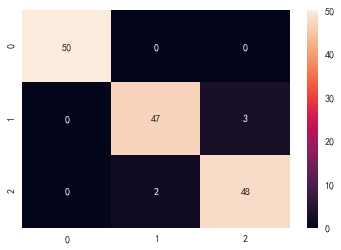

In [150]:
### 混淆矩阵
cm = confusion_matrix(Yc, knnc.predict(Xc), labels=[0, 1,2])
print(cm) 
sns.heatmap(cm,annot=True,) 

In [153]:
### 准确率
## 方法一
knnc.score(Xc,Yc)
## 方法二
from sklearn.metrics import accuracy_score
accuracy_score(Yc,knnc.predict(Xc))

0.9666666666666667

0.9666666666666667

In [159]:
### 查准率/精确率
from sklearn.metrics import precision_score
precision_score(Yc, knnc.predict(Xc))

0.943089430894309

In [160]:
### 查全率/召回率
from sklearn.metrics import recall_score
recall_score(Yc, knnc.predict(Xc))

0.9747899159663865

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

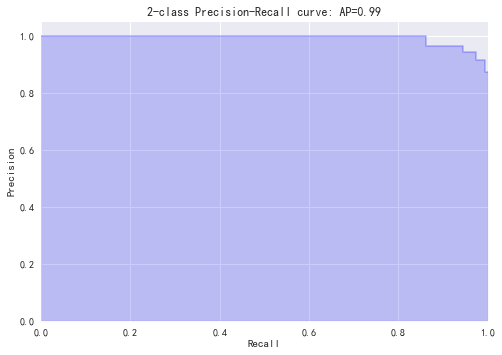

In [6]:
### PR曲线图
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt

average_precision = average_precision_score(Yc,knnc.predict_proba(Xc)[:,1])
precision, recall, _ = precision_recall_curve(Yc,knnc.predict_proba(Xc)[:,1])
 
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [8]:
### F1分数
from sklearn.metrics import f1_score
f1_score(Yc,knnc.predict(Xc))

0.9586776859504134

In [10]:
### 分类报告
from sklearn.metrics import classification_report
print(classification_report(Yc,knnc.predict(Xc)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       212
           1       0.94      0.97      0.96       357

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



In [14]:
### 计算AR。gini等
from sklearn.metrics  import roc_curve,auc
fpr, tpr, thresholds = roc_curve(Yc,knnc.predict(Xc))
roc_auc = auc(fpr, tpr)
ks = max(tpr - fpr)
ar = 2*roc_auc-1
gini = ar
print('test set:  model AR is {0},and ks is {1}'.format(ar,ks)) 

test set:  model AR is 0.8757333121928017,and ks is 0.8757333121928016


In [22]:
### KL距离/IV值   --- 貌似不精确，看书籍上是要分正负样本的
import numpy as np
from scipy import *
def asymmetricKL(P,Q):
    return sum(P * log(P / Q)) #calculate the kl divergence between P and Q
 
def symmetricalKL(P,Q):
    return (asymmetricKL(P,Q)+asymmetricKL(Q,P))/2.00

symmetricalKL(Yc+1,knnc.predict(Xc)+1)

10.397207708399177

<Figure size 720x720 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

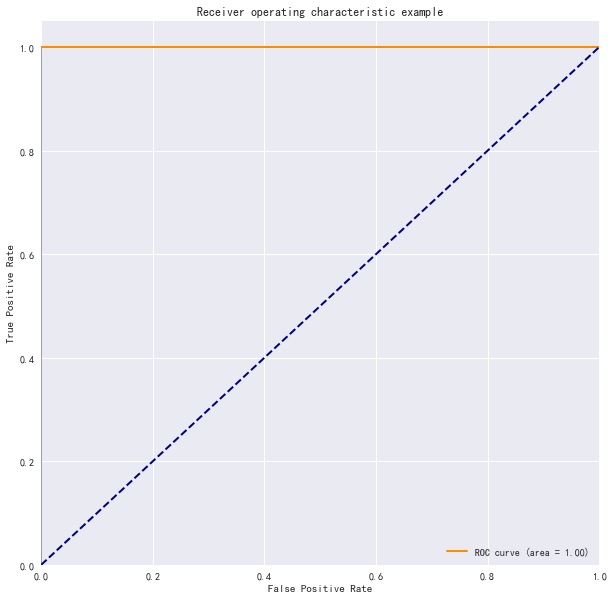

In [158]:
### ROC-AUC曲线 auc值
from sklearn.metrics  import roc_curve,auc

y_score = rfc.predict_proba(Xc)
fpr,tpr,threshold = roc_curve(Yc,y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ### 假阳率为横坐标，真阳率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()  ### 但是AUC的值有点低呀，都快跟瞎猜一样了

<Figure size 720x432 with 0 Axes>

(array([94.92924528,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        10.61320755,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         7.0754717 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

(array([  0.70028011,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   2.45098039,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   3.85154062,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

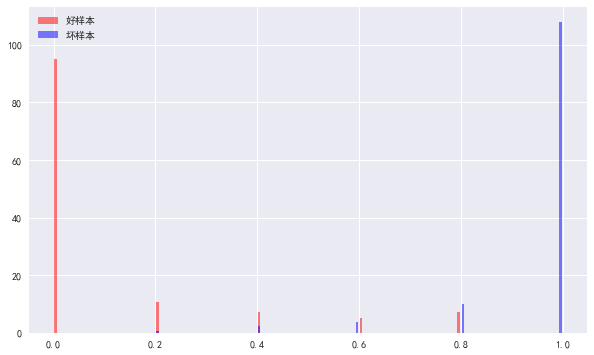

In [28]:
### 预测样本概率直方图比较    若好坏样本的概率直方图有明显的交叠现象，说明模型存在误报与漏报问题
df_pre_all = pd.DataFrame({'y_score':knnc.predict_proba(Xc)[:,1],'y_test':Yc})
df_pre_good = df_pre_all.loc[df_pre_all.y_test==0,]
df_pre_good = df_pre_good.sort_values(['y_score'])
df_pre_bad = df_pre_all.loc[df_pre_all.y_test==1,]
df_pre_bad = df_pre_bad.sort_values(['y_score'])
    
plt.figure(figsize=(10,6))    
plt.hist(df_pre_good.y_score, bins =100, color = 'r',alpha=0.5,rwidth= 0.6, normed=True,label='好样本')
plt.hist(df_pre_bad.y_score, bins =100, color = 'b',alpha=0.5,rwidth= 0.6, normed=True,label='坏样本')
plt.legend()

In [ ]:
### 提升图

In [ ]:
### 洛伦兹图/累积提升图

<Figure size 720x432 with 0 Axes>

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text yticklabel objects>)

Text(0.5, 0, '概率分组')

Text(0, 0.5, '累积占比%')

0.8757333121928016


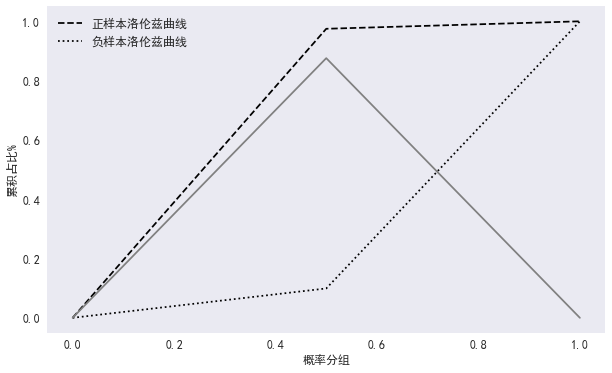

In [29]:
### KS曲线 与 KS值
plt.figure(figsize=(10,6))
fontsize_1 = 12
plt.plot(np.linspace(0,1,len(tpr)),tpr,'--',color='black', label='正样本洛伦兹曲线')
plt.plot(np.linspace(0,1,len(tpr)),fpr,':',color='black', label='负样本洛伦兹曲线')
plt.plot(np.linspace(0,1,len(tpr)),tpr - fpr,'-',color='grey')
plt.grid()
plt.xticks(fontsize=fontsize_1)
plt.yticks(fontsize=fontsize_1)
plt.xlabel('概率分组',fontsize=fontsize_1)
plt.ylabel('累积占比%',fontsize=fontsize_1)
plt.legend(fontsize=fontsize_1)
print(max(tpr - fpr))  ### 最大的KS值   也就是实线的顶峰

In [12]:
### 回归问题 -- 数据加载
from sklearn.datasets import load_boston

lb = load_boston()
X = lb['data']
Y = lb['target']

In [31]:
### 准模型  
from sklearn.linear_model import SGDRegressor,LinearRegression, Ridge,Lasso
sgdr = SGDRegressor()
sgdr.fit(X,Y)
sgdr.score(X,Y)

lr = LinearRegression()
lr.fit(X,Y)
lr.score(X,Y)

rr = Ridge()
rr.fit(X,Y)
rr.score(X,Y)

lsr = Lasso()
lsr.fit(X,Y)
lsr.score(X,Y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

-1.503259924115571e+25

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.7406426641094095

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

0.7388703133867616

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

0.6825842212709925

In [38]:
### 均方误差 MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, lr.predict(X))

21.894831181729202

In [41]:
### 平均绝对值误差 MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, lr.predict(X))

3.2708628109003115

In [40]:
### 均方根误差 RMSE
Pred_Error = mean_squared_error(Y, lr.predict(X))
np.sqrt(Pred_Error)

4.679191295697281

In [36]:
### R平方 
## 方法一
lr.score(X,Y)
## 方法二
from sklearn.metrics import r2_score
r2_score(Y,lr.predict(X))

0.7406426641094095

0.7406426641094095

## 交叉验证

In [43]:
# =====K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证=====
from sklearn.model_selection import train_test_split # 交叉验证所需的函数
from sklearn.model_selection import cross_val_score  # 交叉验证所需的函数
from sklearn.model_selection import cross_validate  # 交叉验证所需的函数
from sklearn.model_selection import KFold, LeaveOneOut  
from sklearn.model_selection import LeavePOut, ShuffleSplit  
# 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold # 分层分割
from sklearn.model_selection import StratifiedShuffleSplit  # 分层分割
from sklearn.model_selection import GroupKFold, LeaveOneGroupOut 
from sklearn.model_selection import LeavePGroupsOut, GroupShuffleSplit  
from sklearn.model_selection import TimeSeriesSplit  

# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(Xc):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(Xc):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(Xc):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)
for train_index, test_index in ss.split(Xc):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# =====分层K折交叉验证、分层随机交叉验证=====
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(Xc,Yc):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(Xc,Yc):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break

# =====组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split=====
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))

k折划分：(284,) (285,)
留一划分：(568,) (1,)
留p划分：(568,) (1,)
随机排列划分：(568,) (1,)
分层K折划分：(379,) (190,)
分层随机划分：(512,) (57,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[0 1 2 6 7 8 9] [3 4 5]
留一组分割：[0 1 2 3 4 5] [6 7 8 9]
留 P 组分割：[6 7 8 9] [0 1 2 3 4 5]
留 P 组分割：[3 4 5] [0 1 2 6 7 8 9]
留 P 组分割：[0 1 2] [3 4 5 6 7 8 9]
随机分割：[0 1 2] [3 4 5 6 7 8 9]
随机分割：[3 4 5] [0 1 2 6 7 8 9]
随机分割：[3 4 5] [0 1 2 6 7 8 9]
随机分割：[3 4 5] [0 1 2 6 7 8 9]


In [ ]:
### 嵌套交叉验证

## 模型融合

In [ ]:
### Voting

In [ ]:
### Averaging

In [ ]:
### Ranking

In [ ]:
### Blending

In [ ]:
### Stacking

# 特征创造

## 业务层面

In [56]:
### 时间特征
time_stamps = ["2019-01-24 20:00:00.360000+00:00","2018-07-04 12:00:00.750000-07:00",
              "2017-12-22 22:00:00.254000+05:00","2016-11-22 00:10:00.000000+10:00"]
df = pd.DataFrame(time_stamps,columns=["Time"])
ts = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df["t"] = ts
df["Year"] = df["t"].apply(lambda x:x.year)                    # The year of the datetime
df["Month"] = df["t"].apply(lambda x:x.month)                  # The month of the datetime
df["Day"] = df["t"].apply(lambda x:x.day)                      # The days of the datetime
df["DayOfWeek"] = df["t"].apply(lambda x:x.dayofweek)          # The number of the day of the week with Monday=0, Sunday=6
df["DayName"] = df["t"].apply(lambda x:x.day_name())         # The name of the day in a week (ex: Friday)
df["DayOfYear"] = df["t"].apply(lambda x:x.dayofyear)          # The ordinal day of year
df["WeekOfYear"] = df["t"].apply(lambda x:x.weekofyear)        # The week ordinal of the year
df["Quarter"] = df["t"].apply(lambda x:x.quarter)              # Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc.
df["Hour"] = df["t"].apply(lambda x:x.hour)                    # The hour of the datetime
df["Minute"] = df["t"].apply(lambda x:x.minute)                # The minutes of the datetime
df["Second"] = df["t"].apply(lambda x:x.second)                # The seconds of the datetime
df["Microsecond"] = df["t"].apply(lambda x:x.microsecond)      # The microseconds of the datetime
df

### 比例/百分比特征

### 其余业务特征

,Time,t,Year,Month,Day,DayOfWeek,DayName,DayOfYear,WeekOfYear,Quarter,Hour,Minute,Second,Microsecond
0,2019-01-24 20:00:00.360000+00:00,2019-01-24 20:00:00.360000+00:00,2019,1,24,3,Thursday,24,4,1,20,0,0,360000
1,2018-07-04 12:00:00.750000-07:00,2018-07-04 12:00:00.750000-07:00,2018,7,4,2,Wednesday,185,27,3,12,0,0,750000
2,2017-12-22 22:00:00.254000+05:00,2017-12-22 22:00:00.254000+05:00,2017,12,22,4,Friday,356,51,4,22,0,0,254000
3,2016-11-22 00:10:00.000000+10:00,2016-11-22 00:10:00+10:00,2016,11,22,1,Tuesday,327,47,4,0,10,0,0


## 数学层面

array([[1.00000000e+00, 6.32000000e-03, 1.80000000e+01, ...,
        1.57529610e+05, 1.97656200e+03, 2.48004000e+01],
       [1.00000000e+00, 2.73100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [1.00000000e+00, 2.72900000e-02, 0.00000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       ...,
       [1.00000000e+00, 6.07600000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.00000000e+00, 1.09590000e-01, 0.00000000e+00, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [1.00000000e+00, 4.74100000e-02, 0.00000000e+00, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

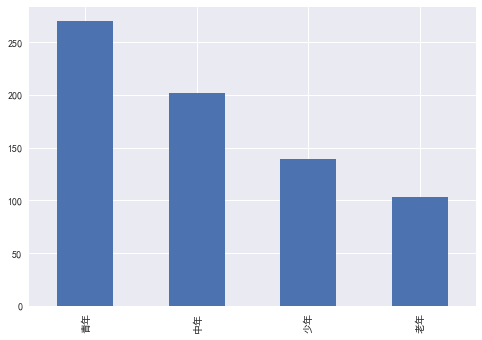

In [60]:
### 分箱

### 概念分层   这里是对连续型数据分层，有点像分箱了   实际上应该对离散型数据分层更有意义  自定义规则
parts = np.array([0, 18,30,45 ,100])
types = ["少年","青年","中年","老年"]
data['wtype'] = [types[np.where(x <= parts)[0][0]-1] if not np.isnan(x) else "未知" for x in data.Age]
data[data.wtype!="未知"].wtype.value_counts().plot.bar()

### 函数变换   --- 在异常值处理 已经存在

### 多项式特征  -- 类似于笛卡尔积效果，只是特征是连续型
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures().fit_transform(X)  #参数degree为度，默认值为2 

In [ ]:
### 在模型中采用核函数

### 时间切片 筛选出几个时间切片的样本集，分别计算描述性统计特征、趋势特征
start = datetime.strptime('2014-01-02 14:07:00', '%Y-%m-%d %H:%M:%S')
end = datetime.strptime('2014-01-02 14:22:00', '%Y-%m-%d %H:%M:%S')

sdf = df[start:end]
sdf = df[start < df.index < end]

In [65]:
### 笛卡尔积特征   -- 仅适合离散型
def func_s(x):
    return str(x[0])+'_Cross_'+str(x[1])
data['Pclass'+'_Cross_'+'Sex'] = data[['Pclass','Sex']].apply(func_s,axis=1)
data['Pclass'+'_Cross_'+'Sex'].value_counts()

3_Cross_male      347
3_Cross_female    144
1_Cross_male      122
2_Cross_male      108
1_Cross_female     94
2_Cross_female     76
Name: Pclass_Cross_Sex, dtype: int64

## 模型层面

In [3]:
### 数据加载
from sklearn.datasets import load_iris

lb = load_iris()
Xcc = pd.DataFrame(lb['data'],columns=['a','b','c','d'])
Ycc = pd.DataFrame(lb['target'],columns=['target'])

In [5]:
### 添加树特征
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

##GBDT模型
GBDT_model= GradientBoostingClassifier(subsample=0.8,max_features=0.8, validation_fraction=0.1, 
                                    n_iter_no_change =4,random_state=0,n_estimators=20,max_depth=2,learning_rate=0.1)
##训练GBDT模型
GBDT_model_fit = GBDT_model.fit(Xcc, Ycc)
    
###用apply方法得到树的映射结果
train_new_feature = GBDT_model_fit.apply(Xcc)[:,:,0]
# test_new_feature = GBDT_model_fit.apply(Xtest)[:,:,0]
train_new_feature                                       
#np.unique(train_new_feature[:,1])

###  One-hot编码
enc = OneHotEncoder(dtype='int').fit(train_new_feature)
df_train = pd.DataFrame( enc.transform(train_new_feature).toarray())
df_train
# df_test = pd.DataFrame( enc.transform(test_new_feature).toarray())

### 合并得到新的数据集   -----
# x_train_1 = np.hstack([x_train,df_train])
# x_test_1 = np.hstack([x_test,df_test])

array([[1., 1., 1., ..., 3., 3., 3.],
       [1., 1., 1., ..., 3., 3., 3.],
       [1., 1., 1., ..., 3., 3., 3.],
       ...,
       [2., 4., 4., ..., 6., 6., 6.],
       [2., 4., 4., ..., 6., 6., 6.],
       [2., 4., 4., ..., 5., 5., 5.]])

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
146,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
147,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
148,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [32]:
### FM特征交叉
####取出训练数据与测试数据
from sklearn.model_selection import train_test_split
data_train,data_test,y_train,y_test=train_test_split(Xcc,Ycc,test_size=0.2,random_state=0)
var_all = list(data_train.columns)  ### 记录训练集的列索引

from sklearn.feature_extraction import DictVectorizer
from pyfm import pylibfm
df_all = pd.concat([data_train,data_test],axis=0)   ### 训练数据与测试数据合并
###df转为字典
df_all =  df_all[var_all].to_dict(orient='records')  ### 在合并数据集中对训练数据的特征
x_train =  data_train[var_all].to_dict(orient='records')  ### 在训练集中对训练数据
x_test =  data_test[var_all].to_dict(orient='records') ### 在测试集中对训练数据
##字典转为稀疏矩阵
model_dictV = DictVectorizer().fit(df_all)  ### 先一次fit
x_train = model_dictV.fit_transform(x_train) ### 然后再一次fit
x_test = model_dictV.transform(x_test)

    ##可以查看系数矩阵的内容
print(x_test.toarray())
st = x_test.toarray()
    
fm = pylibfm.FM(num_factors=5, num_iter=500, verbose=True, task="classification",
                    initial_learning_rate=0.0001, learning_rate_schedule="optimal")
fm.fit(x_train, np.array(y_train.target))
y_score_test = fm.predict(x_test)
y_pred = [1 if x >=0.5 else 0 for x in y_score_test ]
### 评估
from sklearn.metrics import accuracy_score
accuracy_score(y_test.target,y_pred)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.6 1.4 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]]
Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training log loss: 0.73720
-- Epoch 2
Training log loss: 0.68243
-- Epoch 3
Training log loss: 0.65621
-- Epoch 4
Training log loss: 0.64341
-- Epoch 5
Training log loss: 0.63666
-- Epoch 6
Training log loss: 0.63161
-- Epoch 7
Training log loss: 0.62792
-- Epoch 8
Training log loss: 0.62533
-- Epoch 9
Training log loss: 0.62323
-- Epoch 10

Training log loss: 0.54801
-- Epoch 197
Training log loss: 0.54769
-- Epoch 198
Training log loss: 0.54751
-- Epoch 199
Training log loss: 0.54728
-- Epoch 200
Training log loss: 0.54682
-- Epoch 201
Training log loss: 0.54676
-- Epoch 202
Training log loss: 0.54655
-- Epoch 203
Training log loss: 0.54625
-- Epoch 204
Training log loss: 0.54600
-- Epoch 205
Training log loss: 0.54576
-- Epoch 206
Training log loss: 0.54549
-- Epoch 207
Training log loss: 0.54531
-- Epoch 208
Training log loss: 0.54506
-- Epoch 209
Training log loss: 0.54480
-- Epoch 210
Training log loss: 0.54455
-- Epoch 211
Training log loss: 0.54432
-- Epoch 212
Training log loss: 0.54397
-- Epoch 213
Training log loss: 0.54379
-- Epoch 214
Training log loss: 0.54356
-- Epoch 215
Training log loss: 0.54324
-- Epoch 216
Training log loss: 0.54307
-- Epoch 217
Training log loss: 0.54264
-- Epoch 218
Training log loss: 0.54258
-- Epoch 219
Training log loss: 0.54231
-- Epoch 220
Training log loss: 0.54185
-- Epoch 221


Training log loss: 0.48938
-- Epoch 409
Training log loss: 0.48855
-- Epoch 410
Training log loss: 0.48891
-- Epoch 411
Training log loss: 0.48876
-- Epoch 412
Training log loss: 0.48800
-- Epoch 413
Training log loss: 0.48812
-- Epoch 414
Training log loss: 0.48763
-- Epoch 415
Training log loss: 0.48742
-- Epoch 416
Training log loss: 0.48714
-- Epoch 417
Training log loss: 0.48687
-- Epoch 418
Training log loss: 0.48551
-- Epoch 419
Training log loss: 0.48580
-- Epoch 420
Training log loss: 0.48596
-- Epoch 421
Training log loss: 0.48569
-- Epoch 422
Training log loss: 0.48534
-- Epoch 423
Training log loss: 0.48498
-- Epoch 424
Training log loss: 0.48478
-- Epoch 425
Training log loss: 0.48442
-- Epoch 426
Training log loss: 0.48360
-- Epoch 427
Training log loss: 0.48384
-- Epoch 428
Training log loss: 0.48332
-- Epoch 429
Training log loss: 0.48325
-- Epoch 430
Training log loss: 0.48234
-- Epoch 431
Training log loss: 0.48266
-- Epoch 432
Training log loss: 0.48168
-- Epoch 433


0.5

# 标准化

In [49]:
### 标准化
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(X)

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [51]:
### 归一化/区间缩放法
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(X) 

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [52]:
### 二值化
from sklearn.preprocessing import Binarizer
Binarizer(threshold=3).fit_transform(X)

array([[0., 1., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.]])

# 特征筛选

## 基于统计的方法/单变量

In [19]:
### 方差过滤
from sklearn.feature_selection import VarianceThreshold
VTS = VarianceThreshold(threshold = 0)  ### 过滤法会使dataframe变成array，注意
Xvs = VTS.fit_transform(Xcc)
Xtrain = pd.DataFrame(Xvs,columns=Xcc.columns[VTS.get_support()])

In [ ]:
### 业务指标过滤  如IV和PSI指标

In [15]:
### 相关性指标过滤

## 卡方过滤
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2val,pval = chi2(Xcc,Ycc)
k_value = chi2val.shape[0] - (pval>0.05).sum()
SKB = SelectKBest(chi2, k = k_value)
Xchi2 = SKB.fit_transform(Xcc,Ycc)
Xtrain = pd.DataFrame(Xchi2,columns=Xcc.columns[SKB.get_support()])
Xtrain.head() 

## F过滤
from sklearn.feature_selection import f_classif
fval,pval = f_classif(Xcc,Ycc)
k_value = fval.shape[0] - (pval>0.05).sum()
SKB_F = SelectKBest(f_classif, k = k_value)
X_fsf = SKB_F.fit_transform(Xcc, Ycc)
Xtrain = pd.DataFrame(X_fsf,columns=Xcc.columns[SKB_F.get_support()])
Xtrain.head()

# 互信息法
from sklearn.feature_selection import mutual_info_classif as mic
# mval = mic(Xcc,Ycc)
# k_value = mval.shape[0] - (pval>0.05).sum()
X_fsMIC = SelectKBest(mic, k = 2)
X_fs_MIC = X_fsMIC.fit_transform(Xcc,Ycc)
Xtrain = pd.DataFrame(X_fs_MIC,columns=Xcc.columns[X_fsMIC.get_support()])
Xtrain.head()

,a,c,d
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


,a,b,c,d
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,c,d
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## 基于模型的方法/多变量

In [16]:
### 包装法-RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
RFC_ = RandomForestClassifier(n_estimators = 50)
selector = RFE(RFC_, n_features_to_select = 3, step = 50)
sel_X = selector.fit_transform(Xcc,Ycc)
Xtrain = pd.DataFrame(sel_X,columns=Xcc.columns[selector.get_support()])
Xtrain.head()

,a,c,d
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [17]:
### 嵌入法-SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
rfc_ = RandomForestClassifier(n_estimators = 50)
SFM = SelectFromModel(rfc_, threshold = 0.005)
sfm_X = SFM.fit_transform(Xcc,Ycc)
Xtrain = pd.DataFrame(sfm_X,columns=Xcc.columns[SFM.get_support()])
Xtrain.head()

,a,b,c,d
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 样本标签不均衡处理

In [7]:
### 失衡数据加载
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler,NearMiss,TomekLinks,EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
# from imblearn.ensemble import EasyEnsemble,BalanceCascade
import math
import warnings
warnings.filterwarnings("ignore") ##忽略警告

path = './'
data_path = os.path.join(path,'data')
file_name = 'german.csv'
data_df = pd.read_csv( os.path.join(data_path, file_name), delim_whitespace = True, header = None )
##变量重命名
columns = ['status_account','duration','credit_history','purpose', 'amount',
               'svaing_account', 'present_emp', 'income_rate', 'personal_status',
               'other_debtors', 'residence_info', 'property', 'age',
               'inst_plans', 'housing', 'num_credits',
               'job', 'dependents', 'telephone', 'foreign_worker', 'target']
data_df.columns = columns
##将标签变量由状态1,2转为0,1;0表示好用户，1表示坏用户
data_df.target = df.target - 1
sum( data_df.target == 1 )
sum( data_df.target == 0 )

x_data = data_df.loc[:,data_df.columns != 'target']  ### 训练集和测试集合并后但没有Y变量
y_data = data_df.target ### 训练集和测试集合并后但有Y变量

cont_name = ['duration', 'amount', 'income_rate',  'residence_info',  
               'age',  'num_credits','dependents']
x_cont_data = data_df[cont_name]  ### 原始数据的连续型变量

## 下采样

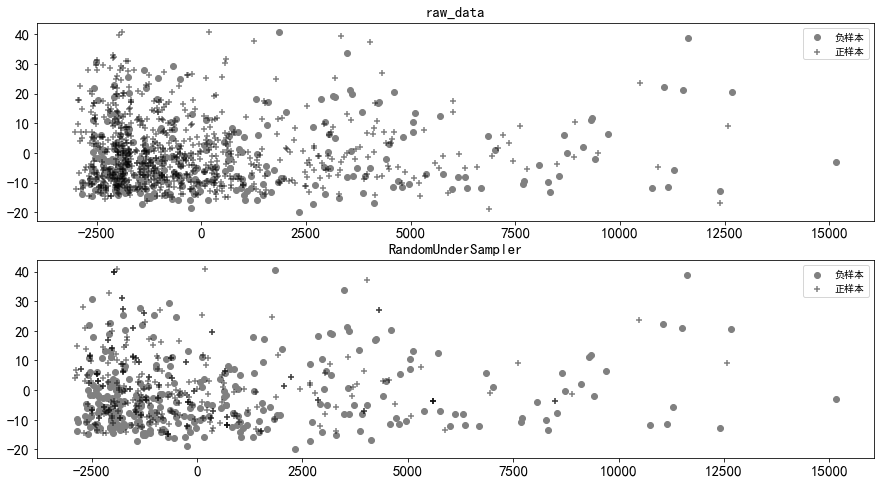

In [8]:
###随机下采样
rand_under_sample= RandomUnderSampler(random_state=10, replacement=True,ratio=1)
X_resample, y_resample = rand_under_sample.fit_sample(x_data, y_data)  ### 进行下采样
X_res = pd.DataFrame(X_resample,columns=x_data.columns)  ### 将结果重新转换为dataframe
X_res.shape
##查看下采样索引
rand_under_sample.sample_indices_  
##PCA方法降维   使用数据集中的连续型变量在采样前后降维图像来表示结果比较
##PCA降维，到2维
model_pca = PCA(n_components=2).fit(x_cont_data)  ### 原始数据的连续型变量训练PCA
X_pca_raw = model_pca.transform(x_cont_data)
X_pca_1 = model_pca.transform(X_res[cont_name])  ### 并应用于 下采样后的数据

##降维后,用前两维的
plt.figure(figsize=(15, 8))
fontsize_1 = 15
##原始数据降维结果
plt.subplot(211)
index_1 = y_data==0
plt.scatter(X_pca_raw[index_1, 0], X_pca_raw[index_1, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_raw[~index_1, 0], X_pca_raw[~index_1, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('raw_data',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##采样数据降维结果
plt.subplot(212)
index_2 = y_data[rand_under_sample.sample_indices_]==0
plt.scatter(X_pca_1[index_2, 0], X_pca_1[index_2, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_1[~index_2, 0], X_pca_1[~index_2, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('RandomUnderSampler',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()

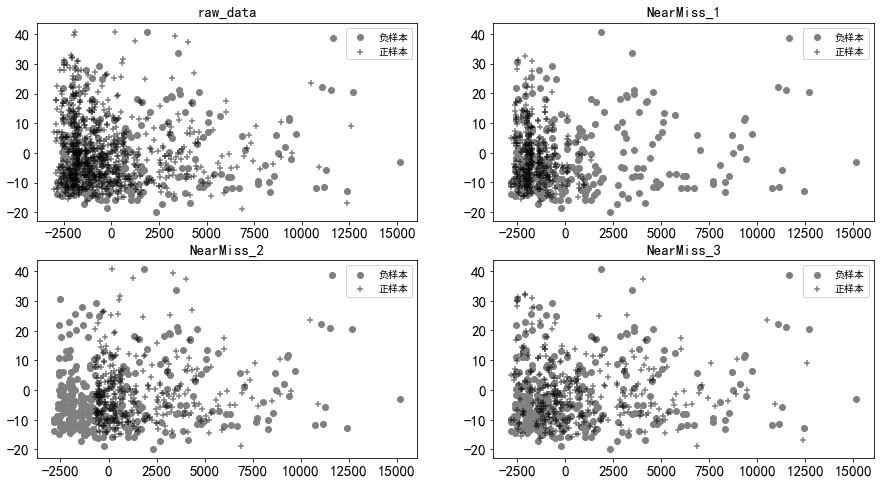

In [9]:
##nearmiss方法
near_miss_1 = NearMiss(random_state=10, version=1,n_neighbors=3,ratio=1)
X_resample_1, y_resample_1 = near_miss_1.fit_sample(x_cont_data, y_data)
near_miss_2 = NearMiss(random_state=10, version=2,n_neighbors=3,ratio=1)
X_resample_2, y_resample_2 = near_miss_2.fit_sample(x_cont_data, y_data)
near_miss_3 = NearMiss(random_state=10, version=3,n_neighbors=3,ratio=1)
X_resample_3, y_resample_3 = near_miss_3.fit_sample(x_cont_data, y_data)
##PCA降维，到2维
model_pca = PCA(n_components=2).fit(x_cont_data)
X_pca_raw = model_pca.transform(x_cont_data)
X_pca_1 = model_pca.transform(X_resample_1)
X_pca_2 = model_pca.transform(X_resample_2)
X_pca_3 = model_pca.transform(X_resample_3)

##降维后,用前两维的
plt.figure(figsize=(15, 8))
fontsize_1 = 15
##原始数据降维结果
plt.subplot(221)
index_1 = y_data==0
plt.scatter(X_pca_raw[index_1, 0], X_pca_raw[index_1, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_raw[~index_1, 0], X_pca_raw[~index_1, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('raw_data',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##NearMiss_1降维结果
plt.subplot(222)
index_2 = y_resample_1==0
plt.scatter(X_pca_1[index_2, 0], X_pca_1[index_2, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_1[~index_2, 0], X_pca_1[~index_2, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('NearMiss_1',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##NearMiss_2降维结果
plt.subplot(223)
index_3 = y_resample_2==0
plt.scatter(X_pca_2[index_3, 0], X_pca_2[index_3, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_2[~index_3, 0], X_pca_2[~index_3, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('NearMiss_2',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##NearMiss_3降维结果
plt.subplot(224)
index_4 = y_resample_3==0
plt.scatter(X_pca_3[index_4, 0], X_pca_3[index_4, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_3[~index_4, 0], X_pca_3[~index_4, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('NearMiss_3',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()

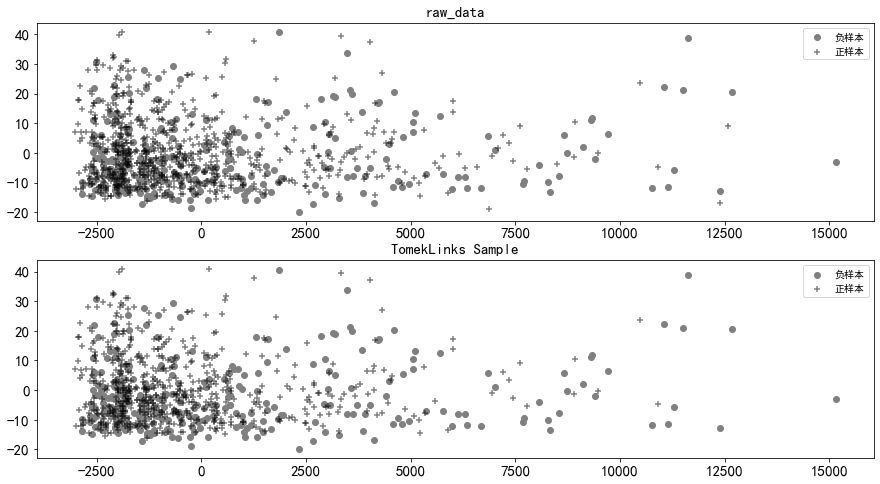

In [10]:
##TomekLinks方法
tom_link = TomekLinks(sampling_strategy='auto',random_state=10)
X_resample, y_resample = tom_link.fit_sample(x_cont_data, y_data)
tom_link.sample_indices_

##PCA降维，到2维
model_pca = PCA(n_components=2).fit(x_cont_data)
X_pca_raw = model_pca.transform(x_cont_data)
X_pca_1 = model_pca.transform(X_resample)
##降维后,用前两维的
plt.figure(figsize=(15, 8))
fontsize_1 = 15
##原始数据降维结果
plt.subplot(211)
index_1 = y_data==0
plt.scatter(X_pca_raw[index_1, 0], X_pca_raw[index_1, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_raw[~index_1, 0], X_pca_raw[~index_1, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('raw_data',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##采样数据降维结果
plt.subplot(212)
index_2 = y_resample==0
plt.scatter(X_pca_1[index_2, 0], X_pca_1[index_2, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_1[~index_2, 0], X_pca_1[~index_2, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('TomekLinks Sample',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()

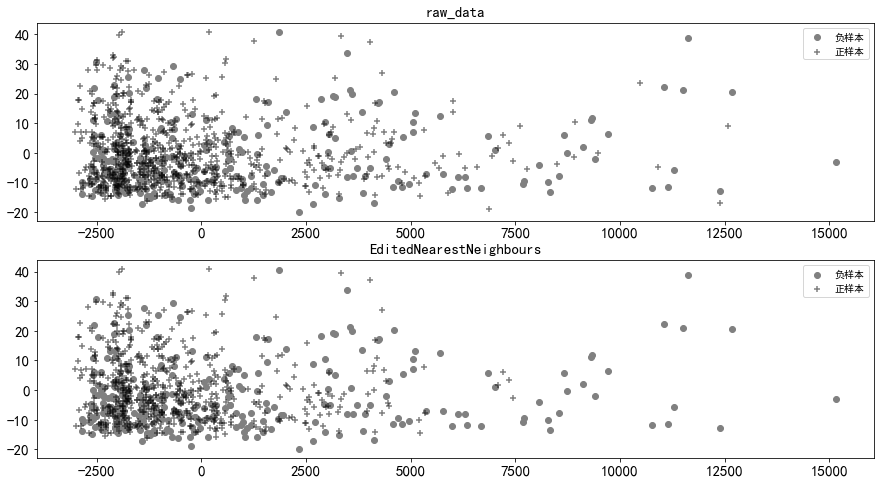

In [11]:
##EditedNearestNeighbours方法
Enn = EditedNearestNeighbours(random_state=10,n_neighbors=3,kind_sel='mode')
X_resample, y_resample = Enn.fit_sample(x_cont_data, y_data)
Enn.sample_indices_

##PCA降维，到2维
model_pca = PCA(n_components=2).fit(x_cont_data)
X_pca_raw = model_pca.transform(x_cont_data)
X_pca_1 = model_pca.transform(X_resample)
##降维后,用前两维的
plt.figure(figsize=(15, 8))
fontsize_1 = 15
##原始数据降维结果
plt.subplot(211)
index_1 = y_data==0
plt.scatter(X_pca_raw[index_1, 0], X_pca_raw[index_1, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_raw[~index_1, 0], X_pca_raw[~index_1, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('raw_data',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##采样数据降维结果
plt.subplot(212)
index_2 = y_resample==0
plt.scatter(X_pca_1[index_2, 0], X_pca_1[index_2, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_1[~index_2, 0], X_pca_1[~index_2, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('EditedNearestNeighbours',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()

## 上采样

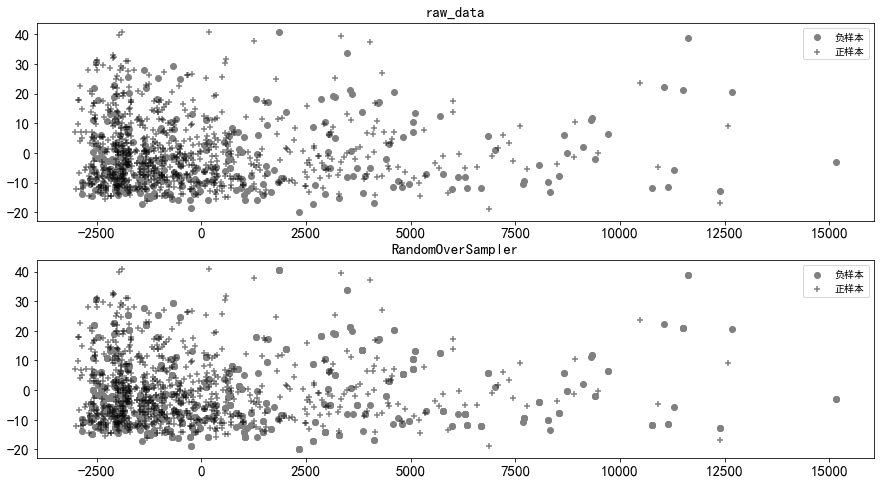

In [12]:
##随机上采样
rand_over_sample= RandomOverSampler(random_state=10,sampling_strategy=1)
X_resample, y_resample = rand_over_sample.fit_sample(x_data, y_data)
X_res = pd.DataFrame(X_resample,columns=x_data.columns)
X_resample.shape

##PCA降维，到2维
model_pca = PCA(n_components=2).fit(x_cont_data)
X_pca_raw = model_pca.transform(x_cont_data)
X_pca_1 = model_pca.transform(X_res[cont_name])

##降维后,用前两维的
plt.figure(figsize=(15, 8))
fontsize_1 = 15
##原始数据降维结果
plt.subplot(211)
index_1 = y_data==0
plt.scatter(X_pca_raw[index_1, 0], X_pca_raw[index_1, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_raw[~index_1, 0], X_pca_raw[~index_1, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('raw_data',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##采样数据降维结果
plt.subplot(212)
index_2 = y_resample==0
plt.scatter(X_pca_1[index_2, 0], X_pca_1[index_2, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_1[~index_2, 0], X_pca_1[~index_2, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('RandomOverSampler',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()

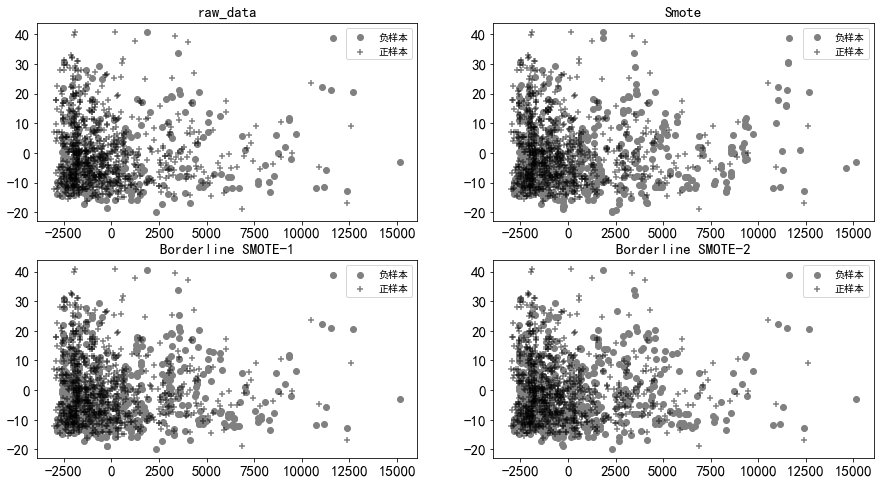

In [15]:
##Smote样本生成方法
sm_sample = SMOTE(random_state=10,sampling_strategy=1,k_neighbors=5,kind='regular')
X_resample, y_resample = sm_sample.fit_resample(x_cont_data, y_data)
X_resample.shape

##Borderline SMOTE-1样本生成   
sm_sample_1 = SMOTE(random_state=10,sampling_strategy=1,k_neighbors=5,kind='borderline1')
X_resample_1, y_resample_1 = sm_sample_1.fit_resample(x_cont_data, y_data)
X_resample_1.shape

##Borderline SMOTE-2样本生成
sm_sample_2 = SMOTE(random_state=10,sampling_strategy=1,k_neighbors=5,kind='borderline2')
X_resample_2, y_resample_2 = sm_sample_2.fit_resample(x_cont_data, y_data)

##PCA降维，到2维
model_pca = PCA(n_components=2).fit(x_cont_data)
X_pca_raw = model_pca.transform(x_cont_data)
X_pca_1 = model_pca.transform(X_resample)
X_pca_2 = model_pca.transform(X_resample_1)
X_pca_3 = model_pca.transform(X_resample_2)

##降维后,用前两维的
plt.figure(figsize=(15, 8))
fontsize_1 = 15
##原始数据降维结果
plt.subplot(221)
index_1 = y_data==0
plt.scatter(X_pca_raw[index_1, 0], X_pca_raw[index_1, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_raw[~index_1, 0], X_pca_raw[~index_1, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('raw_data',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##采样数据降维结果
plt.subplot(222)
index_2 = y_resample==0
plt.scatter(X_pca_1[index_2, 0], X_pca_1[index_2, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_1[~index_2, 0], X_pca_1[~index_2, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('Smote',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##Borderline SMOTE-1降维结果
plt.subplot(223)
index_3 =  y_resample_1==0
plt.scatter(X_pca_2[index_3, 0], X_pca_2[index_3, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_2[~index_3, 0], X_pca_2[~index_3, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('Borderline SMOTE-1',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()
##Borderline SMOTE-2降维结果
plt.subplot(224)
index_4 =  y_resample_2==0
plt.scatter(X_pca_3[index_4, 0], X_pca_3[index_4, 1], c='grey',marker='o',label='负样本')
plt.scatter(X_pca_3[~index_4, 0], X_pca_3[~index_4, 1], c='black',marker='+',alpha=0.5,label='正样本')
plt.title('Borderline SMOTE-2',fontsize=fontsize_1)
plt.xticks( fontsize=fontsize_1)
plt.yticks( fontsize=fontsize_1)
plt.legend()

# 特征学习

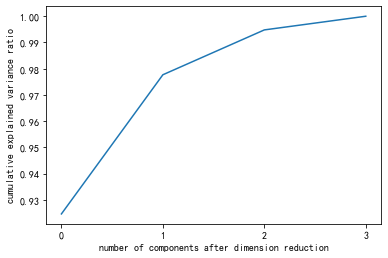

(150, 1)

In [19]:
### PCA降维      使用统计拟合法来创建新特征并消除共线性，是一个很好的方法，但这里我不采用
from sklearn.decomposition import PCA
pca_line = PCA().fit(Xcc)
plt.plot(np.arange(0,Xcc.shape[1]),np.cumsum(pca_line.explained_variance_ratio_))  ### 很经典，[1,2,3,4]是代表特征索引
plt.xticks(np.arange(0,Xcc.shape[1])) #这是为了了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

pca_f = PCA(n_components=0.85,svd_solver="full") # 根据上图，大致判断拐点在0.85的信息贡献率上
X_f = pca_f.fit_transform(Xcc) ## 消除共线性、过拟合、且尽可能保证准确度的同时减少模型训练时间
#X_f2 = pca_f.transform(Xtest) ## 使用训练集信息对测试集也进行降维操作
Xtrain_ = pd.DataFrame(X_f) ## 降维会失去可解释性，因此PCA对象没有返回索引的属性
#Xtest_ = pd.DataFrame(X_f2)
Xtrain_.shape

In [21]:
### LDA降维
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_iris = lda.fit_transform(Xcc, Ycc)
Xtrain_1 = pd.DataFrame(X_lda_iris)
Xtrain_1.shape

(150, 2)

In [23]:
### 受限波尔茨曼机RBM
from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)
rbm.fit(Xcc)
image_new_features = rbm.transform(Xcc)
image_new_features.shape

[BernoulliRBM] Iteration 1, pseudo-likelihood = -19.70, time = 0.02s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -27.75, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -35.81, time = 0.03s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -43.86, time = 0.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -51.91, time = 0.03s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -59.97, time = 0.04s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -68.02, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -76.07, time = 0.04s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -84.12, time = 0.04s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -92.18, time = 0.04s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -100.23, time = 0.03s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -108.28, time = 0.04s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -116.34, time = 0.04s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -124.39, time = 0.04s
[BernoulliRBM] Iteration 

(150, 100)

In [51]:
### 遗传编码
def gen_individuals(k, gen_num, input_data, featureIdx, nMax=10):
    """产生k个个体, gen_num表示每个体对应的固定基因数量"""
    indiv_list = []
    gene_list = []
    for e in range(k):
        indiv = {}
        gene = []
        for i in range(gen_num):
            out = random_get_tree(input_data, featureIdx, nMax) 
            indiv["g"+str(i+1)]=out['f_value']
            gene.append(out['tree_exp'])
        indiv = pd.DataFrame(indiv)
        indiv_list.append(indiv)
        gene_list.append(gene)
    return {"df":indiv_list, "gene": gene_list}

import random 

def random_get_tree(input_data,featureIdx,nMax=10):
    """ 
    从原始数据特征中，随机获取特征表达树  
    featureIdx: 原始特征的下标数值，最小从1开始
    nMax:一次最多从特征中可放回抽样次数，默认为10
    """
    data = pd.DataFrame({"X"+str(e):input_data.iloc[:,(e-1)].values for e in featureIdx})
    
    # 随机抽取N个特征下标
    N = random.choice(range(2,nMax+1))
    
    # 随机决定是使用满二叉树还是偏二叉树
    if random.choice([0,1]) == 1:
        # 选择满二叉树
        select_feature_index = [random.choice(featureIdx) for i in range(N)]+[0]*int(2**np.ceil(np.log2(N)) - N)
        random.shuffle(select_feature_index)
        select_feature_index = ['data.X'+str(e)+".values" if e> 0 else '0' for e in select_feature_index]
        tree_exp = gen_full_tree_exp(select_feature_index)
    else:
        # 选择偏二叉树
        select_feature_index = ['data.X'+str(e)+".values" for e in [random.choice(featureIdx) for i in range(N)]]
        tree_exp =  gen_side_tree_exp(select_feature_index)
    return {"f_value":eval(tree_exp),"tree_exp":tree_exp.replace("data.","").replace(".values","")}

# 构建满二叉树，并生成数学表达式
def gen_full_tree_exp(var_flag_array):
    half_n = len(var_flag_array)//2
    middle_array = []
    for i in range(half_n):
        if var_flag_array[i] == '0' and var_flag_array[i+half_n] != '0':
            middle_array.append('g('+random.choice(one_group)+','+add_one_group(var_flag_array[i+half_n])+')')
        elif var_flag_array[i] != '0' and var_flag_array[i+half_n] == '0':
            middle_array.append('g('+random.choice(one_group)+','+add_one_group(var_flag_array[i])+')')
        elif var_flag_array[i] != '0' and var_flag_array[i+half_n] != '0':
            middle_array.append('g('+random.choice(two_group)+','+add_one_group(var_flag_array[i])+','+add_one_group(var_flag_array[i+half_n])+')')
    if len(middle_array) == 1:
        return add_one_group(middle_array[0])
    else:
        return gen_full_tree_exp(middle_array)
min_number = 0.01

# 一元运算
def log(x):
    return np.sign(x)*np.log2(np.abs(x)+1)

def sqrt(x):
    return np.sqrt(x-np.min(x)+min_number)

def pow2(x):
    return x**2

def pow3(x):
    return x**3

def inv(x):
    return 1*np.sign(x)/(np.abs(x)+min_number)

def sigmoid(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return (1 + np.exp(-x))**(-1)

def tanh(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return np.array([e if e > 0 else 0 for e in x])

def binary(x):
    if np.std(x) < min_number:
        return x
    x = (x - np.mean(x))/np.std(x)
    return np.array([1 if e > 0 else 0 for e in x])

# 二元运算
def add(x,y):
    return x + y

def sub(x,y):
    return x - y

def times(x,y):
    return x * y

def div(x,y):
    return x*np.sign(y)/(np.abs(y)+min_number)

two_group = ['add', 'sub', 'times', 'div']
one_group = ['log', 'sqrt', 'pow2', 'pow3', 'inv', 'sigmoid', 'tanh', 'relu', 'binary']

#构建偏二叉树，并生成数学表达式
def gen_side_tree_exp(var_flag_array):
    if len(var_flag_array) == 1:
        return add_one_group(var_flag_array[0])
    else:
        var_flag_array[1] = 'g('+random.choice(two_group)+','+add_one_group(var_flag_array[0])+','+add_one_group(var_flag_array[1])+')'
        del var_flag_array[0]
        return gen_side_tree_exp(var_flag_array)
    
# 随机增加一元运算符
def add_one_group(feature_string, prob=0.3):
    return 'g('+random.choice(one_group)+','+feature_string+')' if np.random.uniform(0, 1) < prob else feature_string    
    
def g(f, a, b=None):
    """
    f: 一元或二元运算函数
    a: 第一个参数
    b: 如果f是一元运算函数，则b为空，否则代表二元运算的第二个参数
    """
    if b is None:
        return f(a)
    else:
        return f(a,b)    
    
def get_adjust(std_error, y, indiv_data, handle):
    """计算适应度，通过外部定义的handle来处理，同时适用于分类和回归问题"""
    X = indiv_data
    cur_error = handle(X,y)
    return std_error - cur_error if std_error > cur_error else 0

from sklearn import linear_model 

def evaluation_regression(X,y):
    """建立回归问题的评估方法"""
    reg = linear_model.LinearRegression()
    errors = 0
    for i in range(X.shape[0]):
        index = [e for e in range(X.shape[0])]
        index.remove(i)
        X_train = X.iloc[index,:]
        X_test = X.iloc[[i],:]
        y_train = y[index]
        y_test = y[i]
        reg.fit(X_train, y_train)
        errors = errors + (y_test - reg.predict(X_test)[0])**2
    return errors/np.sum(y)

def inter_cross(indiv_list, gene_list, prob):
    """ 对染色体进行交叉操作 """
    gene_num = len(gene_list[0])
    ready_index = list(range(len(gene_list)))
    while len(ready_index) >= 2:
        d1 = random.choice(ready_index)
        ready_index.remove(d1)
        d2 = random.choice(ready_index)
        ready_index.remove(d2)
        if np.random.uniform(0, 1) <= prob:
            loc = random.choice(range(gene_num))
            # print(d1,d2,"exchange loc --> ",loc)
            # 对数据做交叉操作
            if indiv_list is not None:
                tmp = indiv_list[d1].iloc[:,loc]
                indiv_list[d1].iloc[:,loc] = indiv_list[d2].iloc[:,loc]
                indiv_list[d2].iloc[:,loc] = tmp
                
            # 对基因型做交叉操作
            tmp = gene_list[d1][loc]
            gene_list[d1][loc] = gene_list[d2][loc]
            gene_list[d2][loc] = tmp

def mutate(indiv_list, gene_list, prob, input_data, featureIdx, nMax=10):
    gene_num = len(gene_list[0])
    ready_index = list(range(len(gene_list)))
    for i in ready_index:
        if np.random.uniform(0, 1) <= prob:
            loc = random.choice(range(gene_num))
            # print(i,"mutate on --> ",loc)
            tmp = random_get_tree(input_data, featureIdx, nMax) 
            if indiv_list is not None:
                indiv_list[i].iloc[:,loc] = tmp['f_value']
            gene_list[i][loc] = tmp['tree_exp']





import pandas as pd
import numpy as np
# 读入基础数据
cemht = pd.read_csv("http://image.cador.cn/data/cemht.csv")
X = cemht.drop(columns=['No','Y'])
Y = cemht.Y
# 对 X1~X4 进行标准化处理
X = X.apply(lambda x: (x - np.mean(x))/np.std(x),axis=1)
X.head()
Y.head()

std_error = evaluation_regression(X,Y)
std_error

# 产生初始种群，假设种群规模为100
popSize = 100
# 设置特征长度为3
needgs = 3
# 交叉重组触发概率
cross_prob = 0.85
# 突变概率
mutate_prob = 0.1
# 原始特征序号
featureIdx = [1,2,3,4]
# 产生初始种群
individuals = gen_individuals(popSize,needgs,X,featureIdx)
adjusts = []
for df in individuals['df']:
    adjusts.append(get_adjust(std_error, Y, df, evaluation_regression))

np.array(adjusts)

import copy
max_epochs = 1000
for k in range(max_epochs):
    # 0.备份父代个体
    pre_indivs = copy.deepcopy(individuals)
    pre_adjusts = adjusts.copy()
    # 1.交叉
    inter_cross(individuals['df'], individuals['gene'], cross_prob)
    # 2.变异
    mutate(individuals['df'], individuals['gene'], mutate_prob, X, featureIdx)
    # 3.计算适应度
    adjusts = []
    for df in individuals['df']:
        adjusts.append(get_adjust(std_error, Y, df, evaluation_regression))

    # 4.合并，并按adjusts降序排列，取前0.4*popSize个个体进行返回，对剩余的个体随机选取0.6*popSize个返回
    pre_gene_keys = [''.join(e) for e in pre_indivs['gene']]
    gene_keys = [''.join(e) for e in individuals['gene']]
    for i in range(len(pre_gene_keys)):
        key = pre_gene_keys[i]
        if key not in gene_keys:
            individuals['df'].append(pre_indivs['df'][i])
            individuals['gene'].append(pre_indivs['gene'][i])
            adjusts.append(pre_adjusts[i])

    split_val = pd.Series(adjusts).quantile(q=0.6)
    index = list(range(len(adjusts)))
    need_delete_count = len(adjusts) - popSize
    random.shuffle(index)
    indices  = []
    for i in index:
        if need_delete_count > 0:
            if adjusts[i] <= split_val:
                indices.append(i)
                need_delete_count = need_delete_count -1
        else:
            break

    individuals['df'] = [i for j, i in enumerate(individuals['df']) if j not in indices]
    individuals['gene'] = [i for j, i in enumerate(individuals['gene']) if j not in indices]
    adjusts = [i for j, i in enumerate(adjusts) if j not in indices]
    alpha = np.max(adjusts)/np.mean(adjusts)
    if k%100 == 99 or k==0:
        print("第 ",k+1," 次迭代，最大适应度为 ",np.max(adjusts)," alpha : ",alpha)
    if np.mean(adjusts) > 0 and alpha < 1.001:
        print("进化终止，算法已收敛！ 共进化 ",k," 代！")
        break
        
#提取适应度最高的一个个体，获取其特征
loc = np.argmax(adjusts)
new_x = individuals['df'][loc]
new_x.head()

第  1  次迭代，最大适应度为  0  alpha :  nan


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "E:\CabbageSoftware\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-d3da1e3bc322>", line 248, in <module>
    adjusts.append(get_adjust(std_error, Y, df, evaluation_regression))
  File "<ipython-input-51-d3da1e3bc322>", line 144, in get_adjust
    cur_error = handle(X,y)
  File "<ipython-input-51-d3da1e3bc322>", line 161, in evaluation_regression
    errors = errors + (y_test - reg.predict(X_test)[0])**2
  File "E:\CabbageSoftware\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 236, in predict
    return self._decision_function(X)
  File "E:\CabbageSoftware\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 218, in _decision_function
    X = check_array(X, accept_sparse=['csr', 'csc', 'coo'])
  File "E:\CabbageSoftware\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
  

TypeError: object of type 'NoneType' has no len()

# 模型调参

In [59]:
### GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(Xcc, Ycc)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 10}
Accuracy:0.9666666666666667


In [60]:
### RandomizedSearchCV
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(Xcc, Ycc)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'criterion': 'gini', 'max_depth': 29, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 16}
Accuracy:0.9666666666666667


In [6]:
### HyperbandSearchCV
from sklearn.ensemble import RandomForestClassifier
from hyperband import HyperbandSearchCV
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,4),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
hyper = HyperbandSearchCV(clf, param_distributions =rf_params,cv=3,min_iter=10,max_iter=100,scoring='accuracy')
hyper.fit(Xcc, Ycc)
print(hyper.best_params_)
print("Accuracy:"+ str(hyper.best_score_))

HyperbandSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                  max_iter=100, min_iter=10,
                  param_distributions={'criterion': ['gini', 'entropy'],
                                       'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000006F4A1B1AC8>,
                                       'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000006F4A0AE388>,
                                       'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000006F4A1C4748>,
                                       'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000006F4A0CE208>,
                                       'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000006F49B9FCC8>},
                  scoring='accuracy')

{'criterion': 'entropy', 'max_depth': 44, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 33}
Accuracy:0.9666666666666667


In [96]:
### ayesSearchCV 
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
Xcc1 = Xcc.apply(lambda x: (x - np.mean(x))/np.std(x),axis=1)
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,4),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(Xcc1, Ycc)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('criterion', 'gini'), ('max_depth', 31), ('max_features', 3), ('min_samples_leaf', 3), ('min_samples_split', 11), ('n_estimators', 13)])
Accuracy:0.96


In [95]:
### gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args

# Xcc1 = Xcc.apply(lambda x: (x - np.mean(x))/np.std(x),axis=1)
reg = RandomForestClassifier()
# Define the hyperparameter configuration space
space  = [Integer(10, 100, name='n_estimators'),
            Integer(5, 50, name='max_depth'),
          Integer(1, 4, name='max_features'),  #### ----
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['gini', 'entropy'], name='criterion'),]
# Define the objective function
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)
    return -np.mean(cross_val_score(reg, Xcc, Ycc.target, cv=3, n_jobs=-1,scoring="accuracy"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

Accuracy:0.9667
[45, 43, 2, 8, 5, 'gini']


In [92]:
### BO-TPE
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    score = cross_val_score(clf, Xcc, Ycc, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    #print("ROC-AUC {:.3f} params {}".format(score, params))

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 4, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|███████| 20/20 [00:18<00:00,  1.10trial/s, best loss: -0.9666666666666667]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 21.0, 'max_features': 2.0, 'min_samples_leaf': 9.0, 'min_samples_split': 11.0, 'n_estimators': 95.0}


In [18]:
### PSO
import optunity
import optunity.metrics
from sklearn.model_selection import cross_val_score

data=Xcc.values   #### 这里必须都是ndarray类型
labels=Ycc.target.tolist()   #### 

# Define the hyperparameter configuration space
search = {
    'n_estimators': [10, 100],
    'max_features': [1, 4],
    'max_depth': [5,50],
    "min_samples_split":[2,11],
    "min_samples_leaf":[1,11],
    "criterion":[0,1]
         }
# Define the objective function
@optunity.cross_validated(x=data, y=labels, num_folds=3)
def performance(x_train, y_train, x_test, y_test,n_estimators=None, max_features=None,max_depth=None,min_samples_split=None,min_samples_leaf=None,criterion=None):
    # fit the model
    if criterion<0.5:
        cri='gini'
    else:
        cri='entropy'
    model = RandomForestClassifier(n_estimators=int(n_estimators),
                                   max_features=int(max_features),
                                   max_depth=int(max_depth),
                                   min_samples_split=int(min_samples_split),
                                   min_samples_leaf=int(min_samples_leaf),
                                   criterion=cri,
                                  )
    #predictions = model.predict(x_test)
    scores=np.mean(cross_val_score(model, Xcc, Ycc.target, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
    #return optunity.metrics.roc_auc(y_test, predictions, positive=True)
    return scores#optunity.metrics.accuracy(y_test, predictions)

optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=20,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

{'n_estimators': 15.5810546875, 'max_features': 3.83447265625, 'max_depth': 24.53369140625, 'min_samples_split': 2.88330078125, 'min_samples_leaf': 1.2783203125, 'criterion': 0.84130859375}
Accuracy:0.9666666666666667


In [7]:
### DEAP
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': np.logspace(1,1.8,num = 10 ,base=20,dtype='int'),
    'max_depth': np.logspace(1,2,num = 10 ,base=10,dtype='int'),
    "max_features":np.logspace(0.2,1,num = 5 ,base=8,dtype='int'),
    "min_samples_split":np.logspace(0.4, 1, num=5, base=10, dtype='int'), #[2, 3, 5, 7, 10],
    "min_samples_leaf":np.logspace(0.1,1,num = 5 ,base=11,dtype='int'),
    "criterion":['gini','entropy']
}
rf_params = {
    'n_estimators': range(10,100),
    "max_features":range(1,64),
    'max_depth': range(5,50),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    #Categorical(name='criterion', categories=['gini','entropy'])#
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(Xcc, Ycc)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

ModuleNotFoundError: No module named 'evolutionary_search'

In [76]:
### TPOT
from tpot import TPOTClassifier
# Define the hyperparameter configuration space
parameters = {
        'n_estimators': range(20,200),
    "max_features":range(1,64),
    'max_depth': range(10,100),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    "criterion":['gini','entropy']
             }
# Set the hyperparameters of GA                 
ga2 = TPOTClassifier(generations= 3, population_size= 10, offspring_size= 5,
                                 verbosity= 3, early_stop= 5,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 3, scoring = 'accuracy')
ga2.fit(Xcc, Ycc)

1 operators have been imported by TPOT.


_pre_test decorator: _random_mutation_operator: num_test=0 max_features must be in (0, n_features].

Generation 1 - Current Pareto front scores:

-1	0.9666666666666667	RandomForestClassifier(input_matrix, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_depth=94, RandomForestClassifier__max_features=2, RandomForestClassifier__min_samples_leaf=1, RandomForestClassifier__min_samples_split=8, RandomForestClassifier__n_estimators=54)
_pre_test decorator: _random_mutation_operator: num_test=0 max_features must be in (0, n_features].
_pre_test decorator: _random_mutation_operator: num_test=1 max_features must be in (0, n_features].
_pre_test decorator: _random_mutation_operator: num_test=0 max_features must be in (0, n_features].
_pre_test decorator: _random_mutation_operator: num_test=0 max_features must be in (0, n_features].

Generation 2 - Current Pareto front scores:

-1	0.9666666666666667	RandomForestClassifier(input_matrix, RandomForestClassifier__criterion=gini, Ra

TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['gini',
                                                                                      'entropy'],
                                                                        'max_depth': range(10, 100),
                                                                        'max_features': range(1, 64),
                                                                        'min_samples_leaf': range(1, 11),
                                                                        'min_samples_split': range(2, 11),
                                                                        'n_estimators': range(20, 200)}},
               cv=3, early_stop=5, generations=3, offspring_size=5,
               population_size=10, scoring='accuracy', verbosity=3)

<Figure size 2700x1500 with 0 Axes>

<module 'matplotlib.pyplot' from 'E:\\CabbageSoftware\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

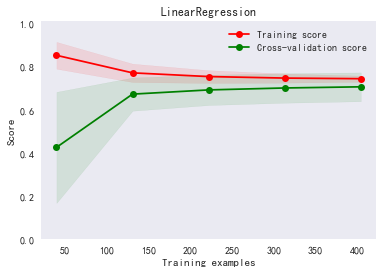

In [125]:
### 学习曲线
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18, 10), dpi=150)


def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=1,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(lr, "LinearRegression", X, Y, ylim=(0,1.01), cv=cv, n_jobs=-1)

Text(0.5, 1.0, 'Validation Curve with SVM')

Text(0.5, 0, '$\\gamma$')

Text(0, 0.5, 'Score')

(0.0, 1.1)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

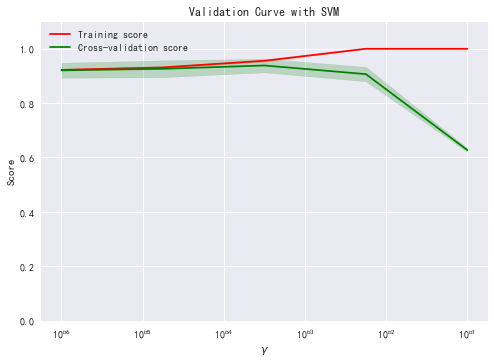

In [45]:
### 验证曲线   
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
#from sklearn.learning_curve import validation_curve
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), Xc, Yc, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

# 模型解释